In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df['Churn'].value_counts()/len(df)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

<Axes: >

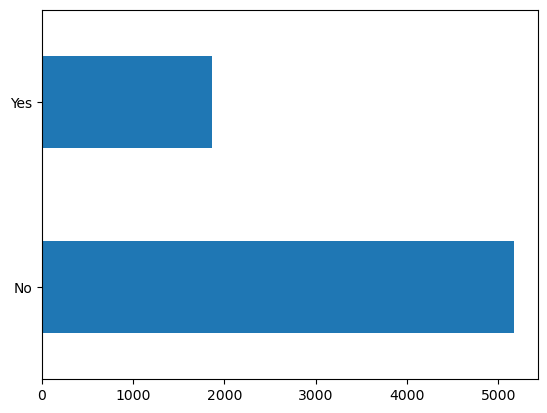

In [11]:
df['Churn'].value_counts().plot(kind='barh')

<Axes: >

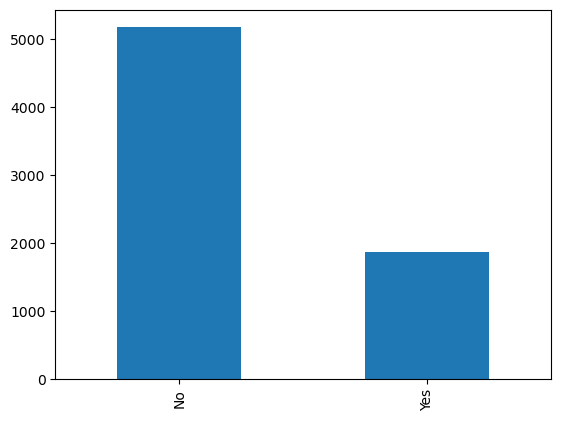

In [12]:
df['Churn'].value_counts().plot(kind='bar')

<Axes: ylabel='Churn'>

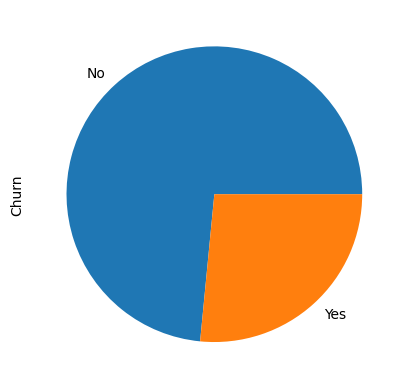

In [13]:
df['Churn'].value_counts().plot(kind='pie')

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


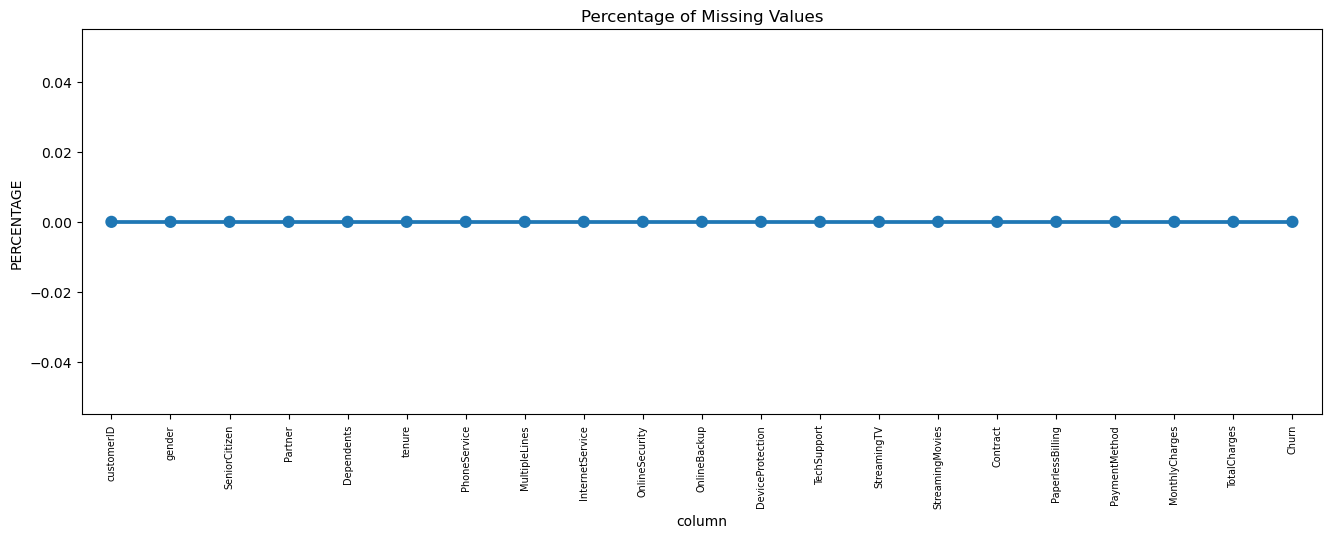

In [16]:
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['column', 'missing_percentage'] 
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='column', y='missing_percentage', data=missing) 
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

In [17]:
new_df = df.copy()

In [18]:
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors="coerce")

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

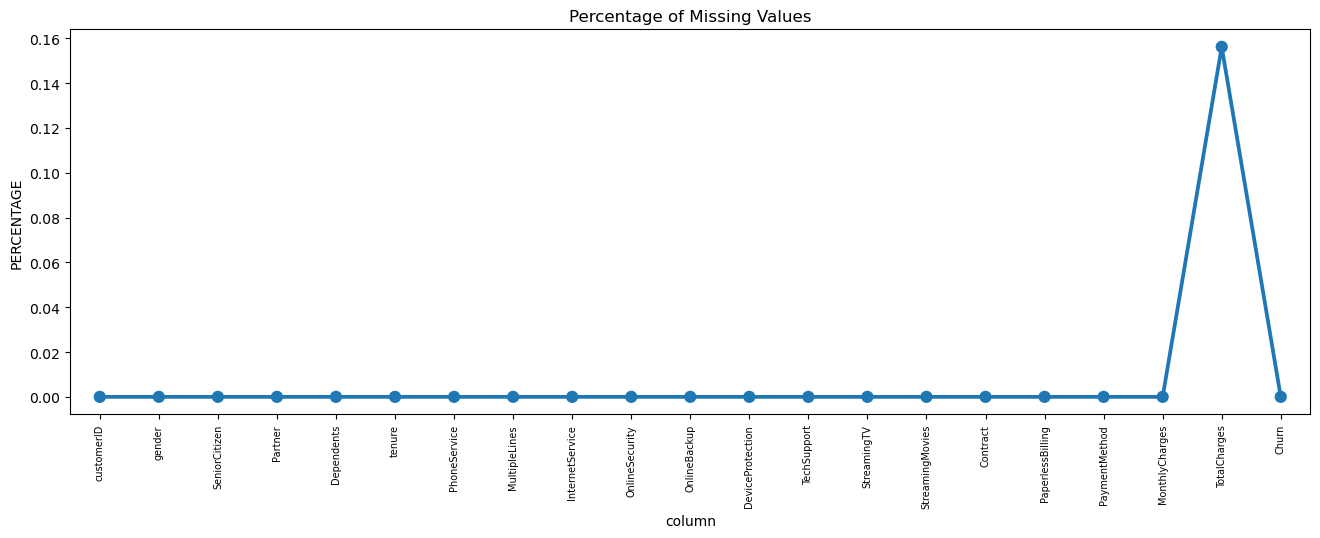

In [22]:
missing = pd.DataFrame((new_df.isnull().sum()) * 100 / new_df.shape[0]).reset_index()
missing.columns = ['column', 'missing_percentage'] 
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='column', y='missing_percentage', data=missing) 
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

In [23]:
new_df.dropna(how ='any', inplace = True)

In [26]:
new_df.shape

(7032, 21)

In [27]:
print(new_df['tenure'].max())

72


In [28]:
labels =["{0} -{1}".format(i,i+11) for i in range(1,72,12)]
print(labels)

['1 -12', '13 -24', '25 -36', '37 -48', '49 -60', '61 -72']


In [29]:
labels =["{0} -{1}".format(i,i+11) for i in range(1,72,12)]
new_df['tenure_group'] = pd.cut(new_df.tenure,range(1,80,12), right=False, labels=labels)

In [30]:
new_df['tenure_group'].value_counts()

1 -12     2175
61 -72    1407
13 -24    1024
25 -36     832
49 -60     832
37 -48     762
Name: tenure_group, dtype: int64

In [31]:
new_df.drop(columns=['customerID','tenure'], axis=1, inplace=True)

In [32]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 -12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 -36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 -12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 -48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 -12


In [33]:
new_df['Churn'].value_counts()/len(new_df)*100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

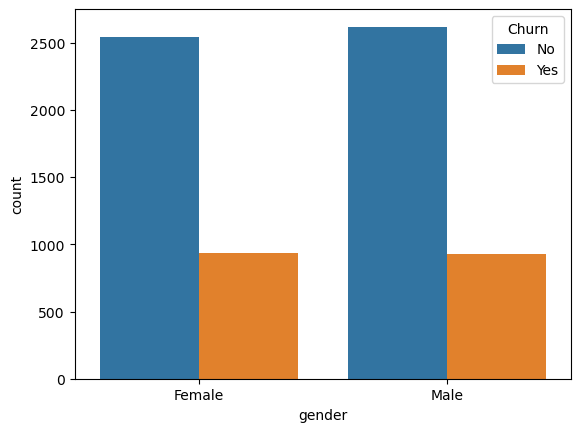

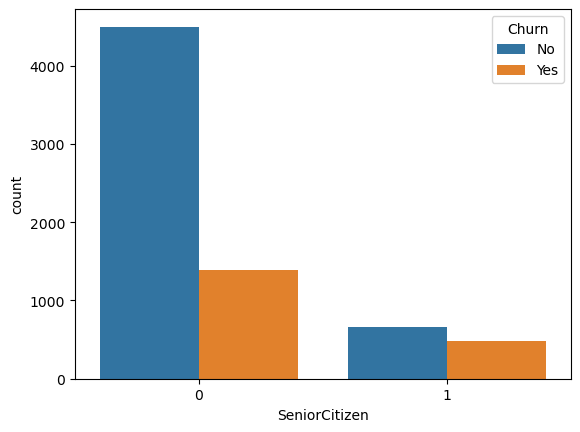

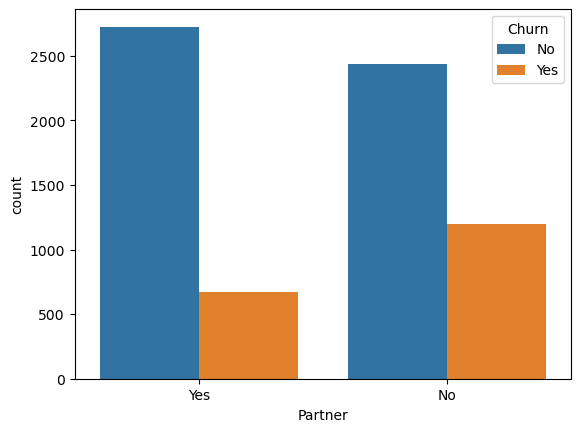

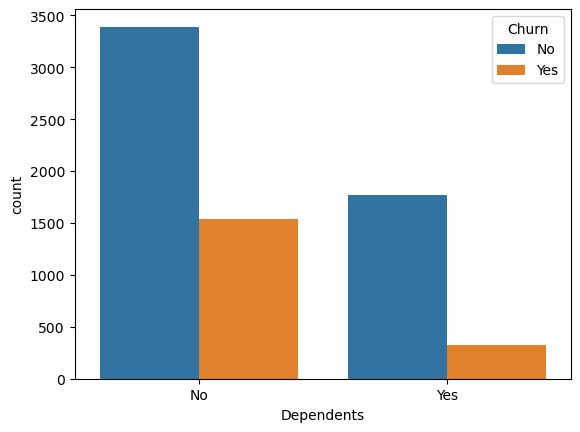

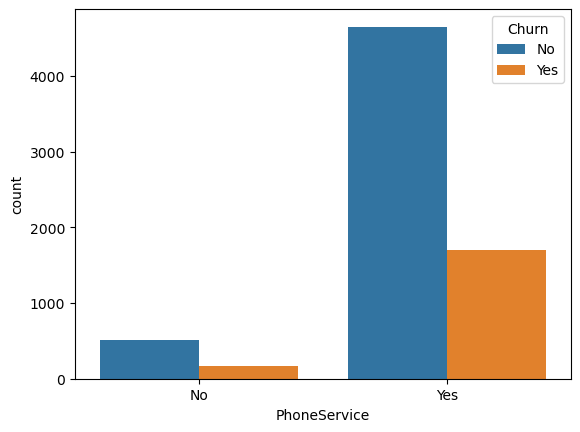

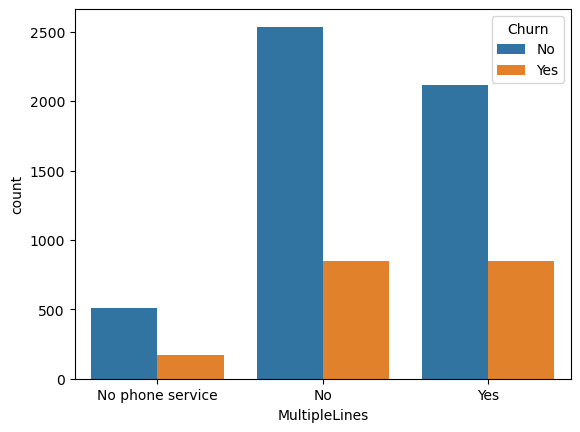

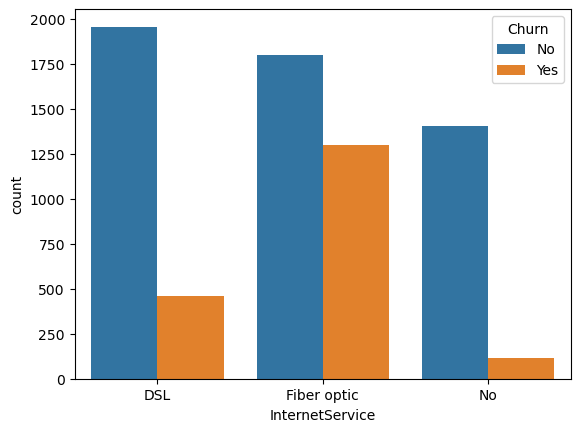

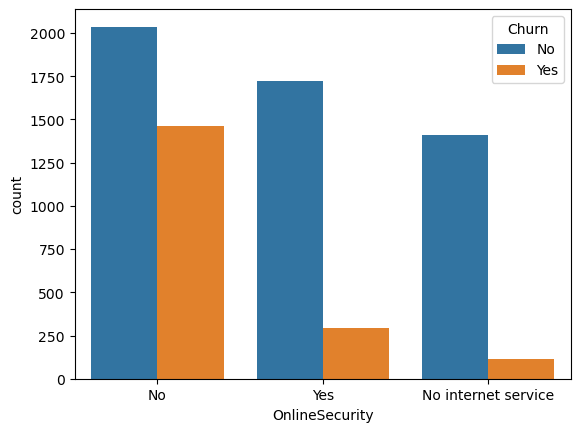

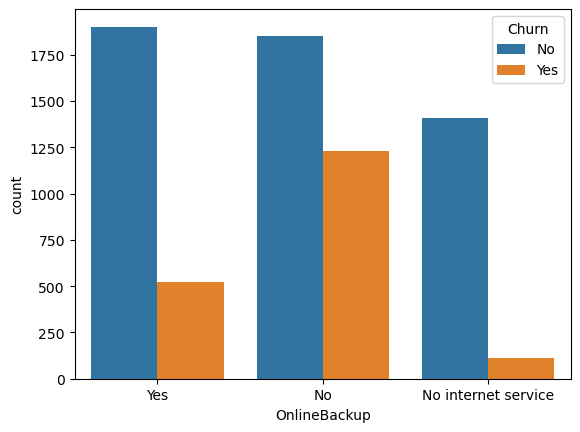

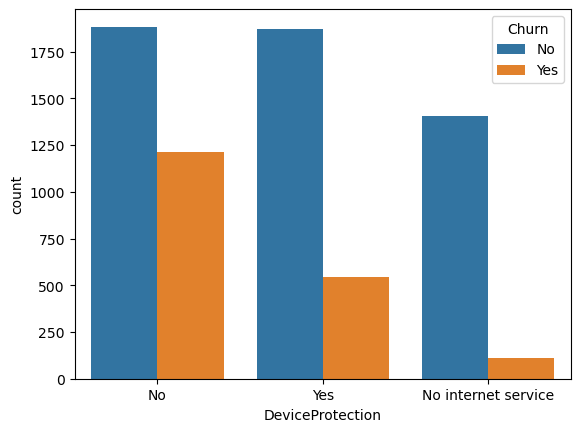

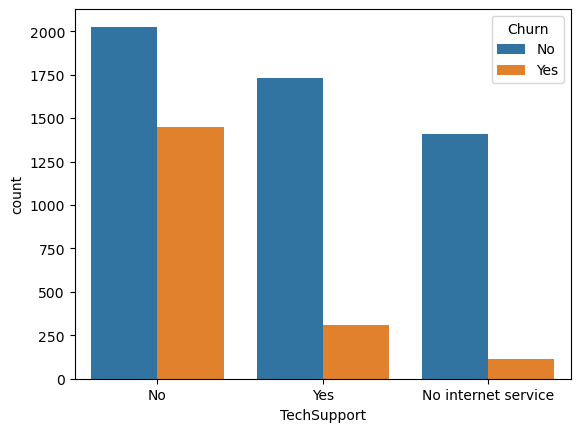

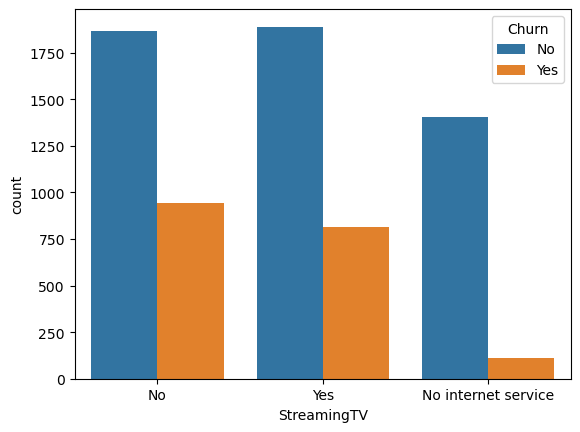

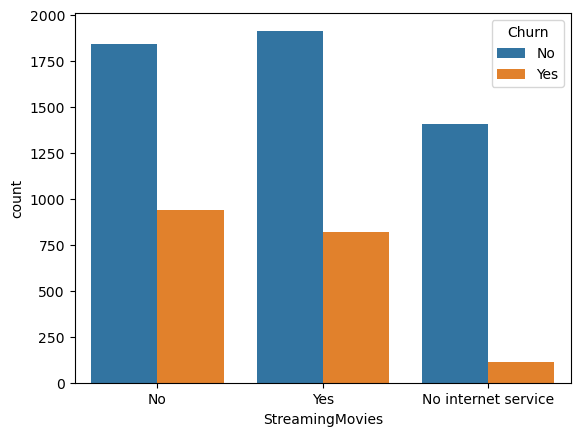

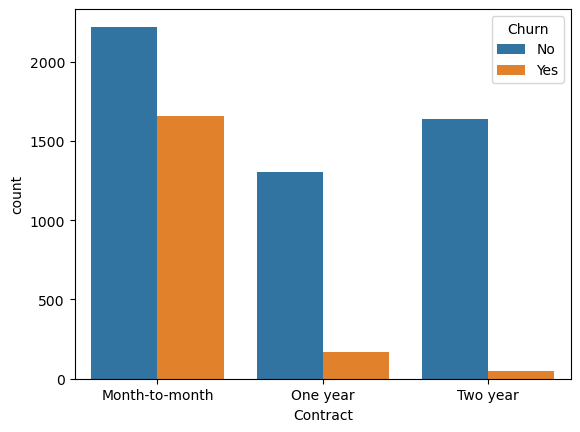

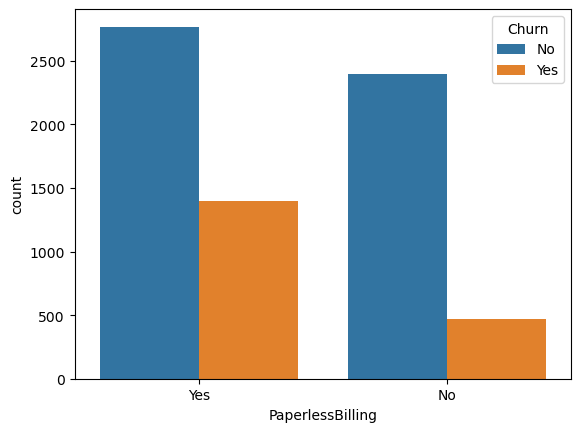

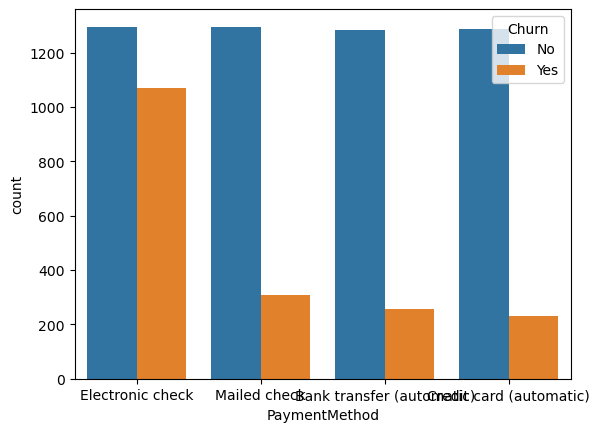

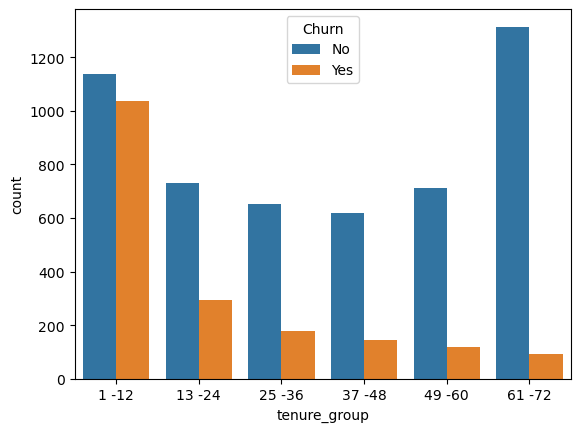

In [34]:
for i, predictor in enumerate(new_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=new_df,x=predictor, hue='Churn')

In [35]:

new_df.SeniorCitizen.value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [36]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [37]:
new_df1_target1.SeniorCitizen.value_counts()

0    1393
1     476
Name: SeniorCitizen, dtype: int64

In [38]:
new_df.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [39]:
new_df1_target1.gender.value_counts()

Female    939
Male      930
Name: gender, dtype: int64

In [40]:
new_df.Partner.value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [41]:
new_df1_target1.Partner.value_counts()

No     1200
Yes     669
Name: Partner, dtype: int64

In [42]:
new_df.Dependents.value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [43]:
new_df1_target1.Dependents.value_counts()

No     1543
Yes     326
Name: Dependents, dtype: int64

In [44]:
new_df.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [46]:
new_df1_target1.PhoneService.value_counts()

Yes    1699
No      170
Name: PhoneService, dtype: int64

In [47]:
new_df.MultipleLines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [48]:
new_df1_target1.MultipleLines.value_counts()

Yes                 850
No                  849
No phone service    170
Name: MultipleLines, dtype: int64

In [49]:
new_df.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [50]:
new_df1_target1.InternetService.value_counts()

Fiber optic    1297
DSL             459
No              113
Name: InternetService, dtype: int64

In [51]:
new_df.OnlineSecurity.value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [52]:
new_df1_target1.OnlineSecurity.value_counts()

No                     1461
Yes                     295
No internet service     113
Name: OnlineSecurity, dtype: int64

In [53]:
new_df.OnlineBackup.value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [54]:
new_df1_target1.value_counts()

gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn  tenure_group
Male    0              No       No          Yes           No             No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  Month-to-month  Yes               Mailed check               20.20           20.20         Yes    1 -12           2
                                                                         DSL              No                   No                   No                   No                   No                   No                   Month-to-month  Yes               Mailed check               45.70           45.70         Yes    1 -12           2
         

In [55]:
new_df.DeviceProtection.value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [56]:
new_df1_target1.DeviceProtection.value_counts()

No                     1211
Yes                     545
No internet service     113
Name: DeviceProtection, dtype: int64

In [57]:
new_df.TechSupport.value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [58]:
new_df1_target1.TechSupport.value_counts()

No                     1446
Yes                     310
No internet service     113
Name: TechSupport, dtype: int64

In [59]:
new_df.StreamingTV.value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [60]:
new_df1_target1.StreamingTV.value_counts()

No                     942
Yes                    814
No internet service    113
Name: StreamingTV, dtype: int64

In [61]:
new_df.StreamingMovies.value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [63]:
new_df. Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [64]:
new_df1_target1.Contract.value_counts()

Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64

In [65]:
new_df.PaperlessBilling.value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [66]:
new_df1_target1.PaperlessBilling.value_counts()

Yes    1400
No      469
Name: PaperlessBilling, dtype: int64

In [67]:
new_df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [68]:
new_df1_target1.PaymentMethod.value_counts()

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

In [69]:
new_df.tenure_group.value_counts()

1 -12     2175
61 -72    1407
13 -24    1024
25 -36     832
49 -60     832
37 -48     762
Name: tenure_group, dtype: int64

In [70]:
new_df1_target1.tenure_group.value_counts()

1 -12     1037
13 -24     294
25 -36     180
37 -48     145
49 -60     120
61 -72      93
Name: tenure_group, dtype: int64

In [71]:
pd.crosstab(new_df.PaymentMethod, new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


Univariate Analysis

•	Senior citizens are more likely to churn with churn rate of 26.45%
•	Gender does not seem to have much impact on churn rate as both male & female are approximately equal in terms of churning       with churn  rate of 26.20% & 26.95% respectively.
•	Customers without partner are more likely to churn with churn rate of 32.97% in comparison of Customers with partner at         churn rate 19.71%.
•	Customers without dependents are more like to churn (31.27%) instead of with dependents Customers (15.53%)
•	Phone Service factor does not seem effective in churning as with or without Phone Service, the churn rate is 26.74% & 25%       respectively.
•	MultipleLines also has approximately equal impact: With MultipleLines (28.64%), no MultipleLines (25.08%) & No Phone             service( 25%)
•	Fiber optic internet service has the most churn rate(41.89%) instead of DSL (18.99%) & No internet service (7.43%)
•	Customers with No online security are more likely to churn( 41.77%) comparatively with online security ( 14.64% ) & no           internet service( 7.43%).
•	Customers with Device protection are less likely to churn( 22.53%), however, in its absence, the churn rate is 39.14%.
•	Tech support plays an important role with less churn rate( 15.19%) in comparison of no tech support churn rate( 41.64%)
•	Customers with or without TV streaming have approximately same churn rate i.e. 30.11% & 33.53% respectively.
•	The churning rate with movie streaming(29.41%) is less than without movie streaming( 33.72%)
•	Month to month contract has the highest churn rate (42.70), on the other hand, 2 year contract has least churn rate( 2.84%)     & 1 year(11.27%)
•	Paper less bill leads to more churn rate( 33.58%) with paper bill( 16.37%)
•	Customers with electronic check method are most likely to churn( 45.28%)
•	Tenure group of (1-12) are most likely to churn with 47.68%


In [72]:
new_df['Churn'] = np.where(new_df.Churn =='Yes',1,0)

In [73]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 -12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 -36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 -12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 -48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 -12


In [78]:
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 -12,tenure_group_13 -24,tenure_group_25 -36,tenure_group_37 -48,tenure_group_49 -60,tenure_group_61 -72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


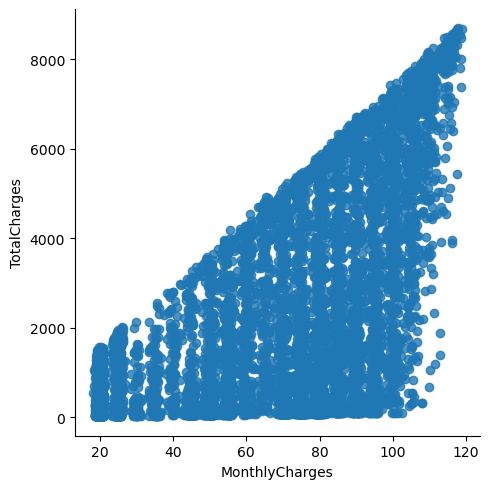

In [76]:
sns.lmplot(data=new_df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [77]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

0.6510648032262024

In [ ]:
There is positive relationship b/w monthly charges & total charges. Total charges increase as the monthly charges increase.

# Churn analysis by Monthly charges & total charges

C:\Users\vicky\AppData\Local\Temp\ipykernel_18080\3436189338.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 0) ],
C:\Users\vicky\AppData\Local\Temp\ipykernel_18080\3436189338.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

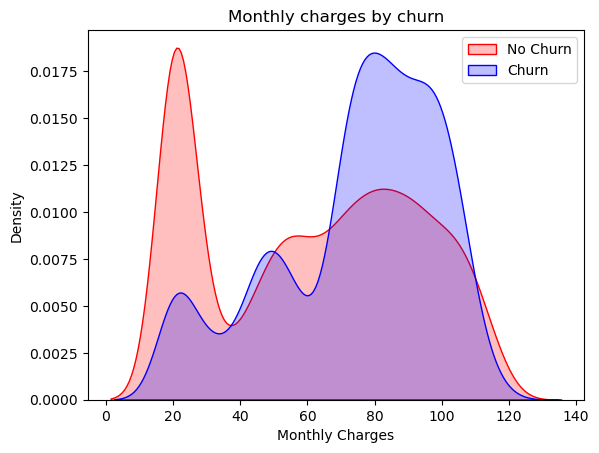

In [79]:
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Insight: Churn rate is high when the monthly charges are high.

C:\Users\vicky\AppData\Local\Temp\ipykernel_18080\223095602.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 0) ],
C:\Users\vicky\AppData\Local\Temp\ipykernel_18080\223095602.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

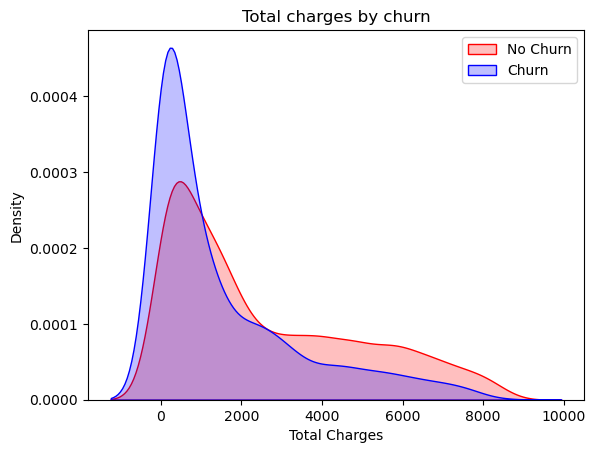

In [80]:
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

In [ ]:
Insight: ##Low total charges tend to high churn rate. It means customers with short duration are more likely to churn.

Corelation of all predictors with 'Churn'

<Axes: >

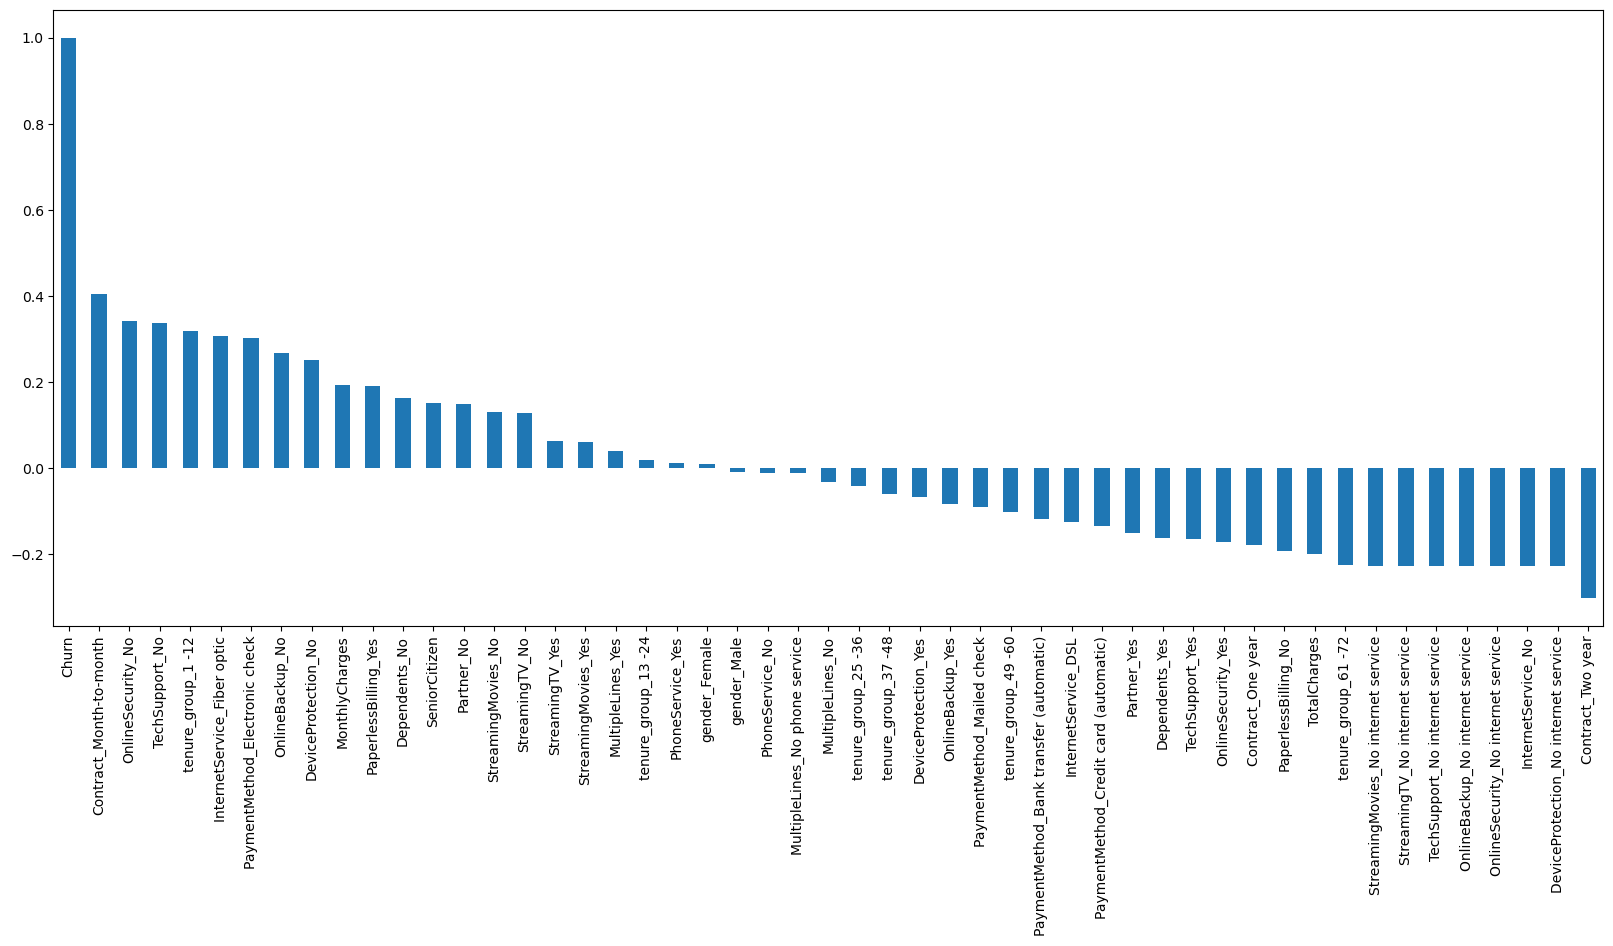

In [81]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [82]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
tenure_group_1 -12                         0.319628
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
tenure_group

<Figure size 2000x800 with 0 Axes>

In [ ]:
Insight: High churn rate in : Month to month contract, No online security,No tech support,first year of subscription, 
        Fibre optic internet service, Electronic check payment method,No online backup, No device protection.
        
        Low Churn rate in : Long term contract & subscriptions without  internet services.
            
        No impact: Gender & Phone service.
        

<Axes: >

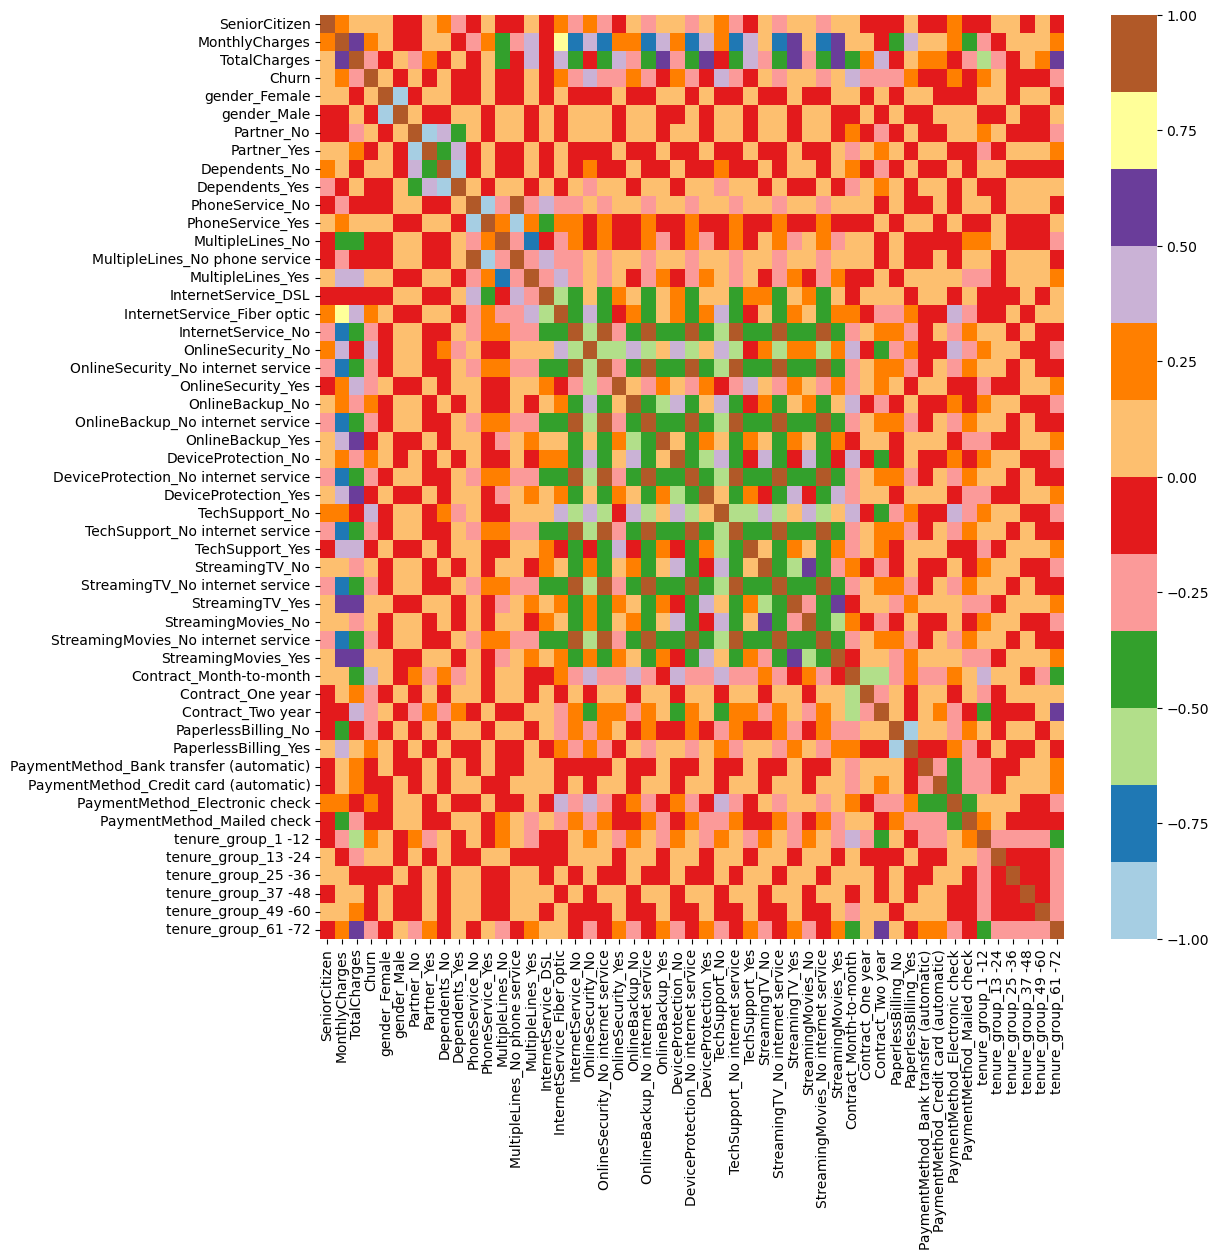

In [83]:
plt.figure(figsize=(12,12))
sns.heatmap(new_df_dummies.corr(), cmap="Paired")

In [84]:
new_df1_target0=new_df.loc[new_df["Churn"]==0]
new_df1_target1=new_df.loc[new_df["Churn"]==1]

In [85]:
len(new_df1_target0)

5163

In [86]:
len(new_df1_target1)

1869

In [87]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

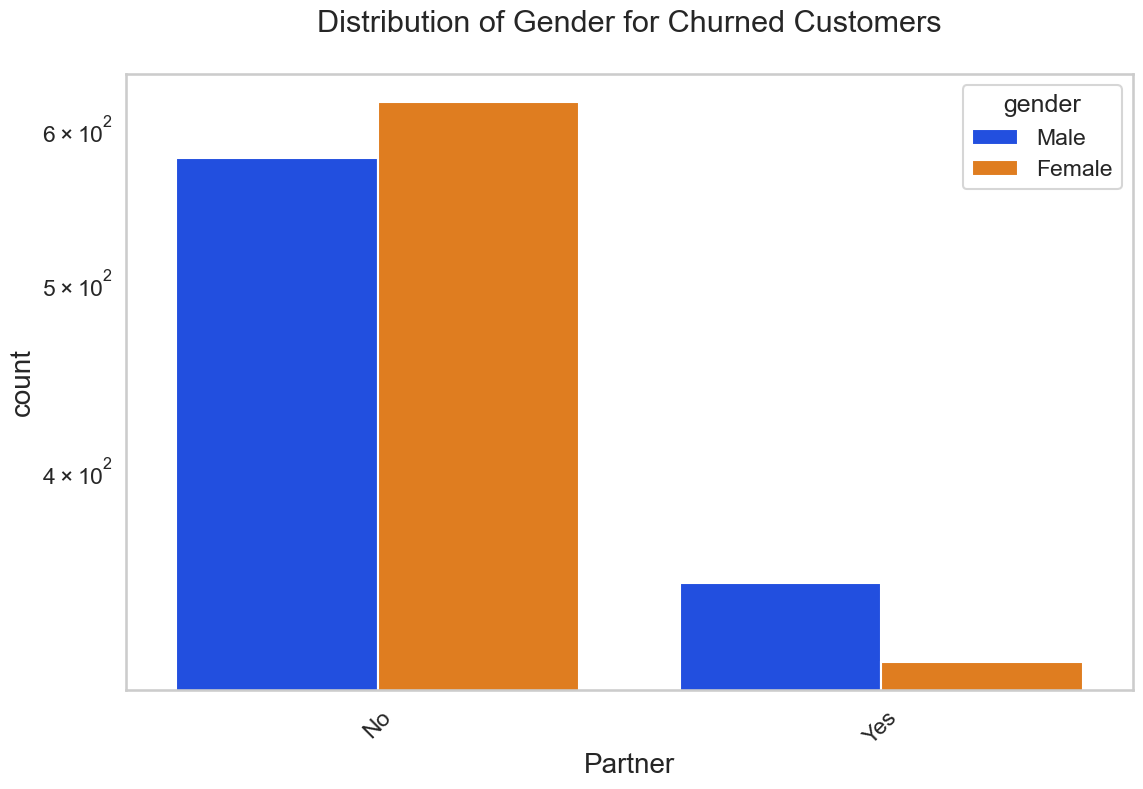

In [88]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

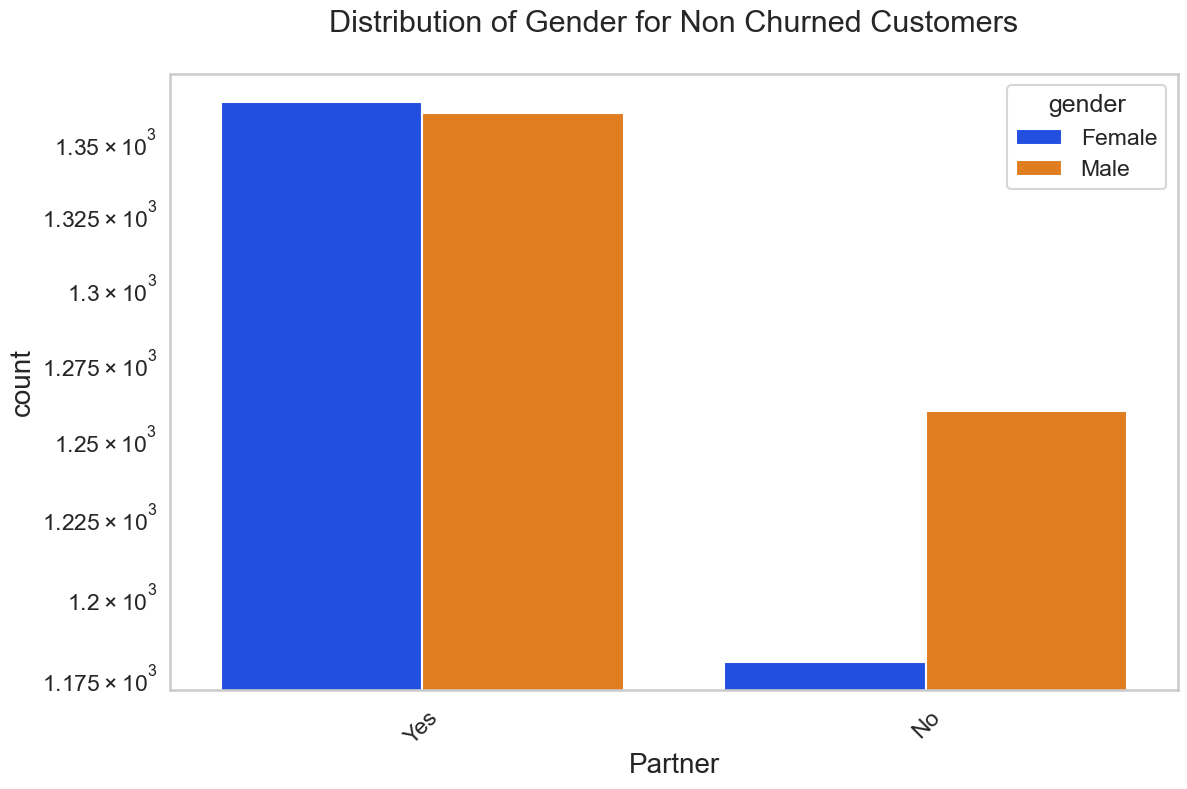

In [89]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

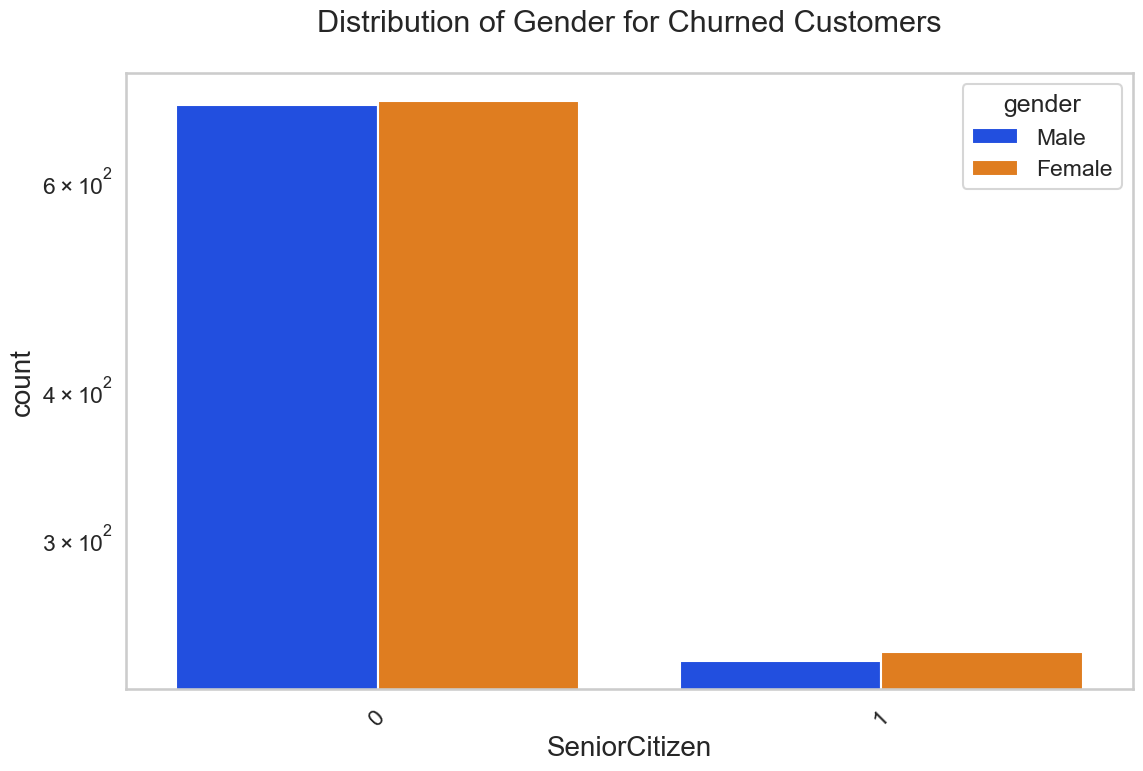

In [90]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of Gender for Churned Customers',hue='gender')

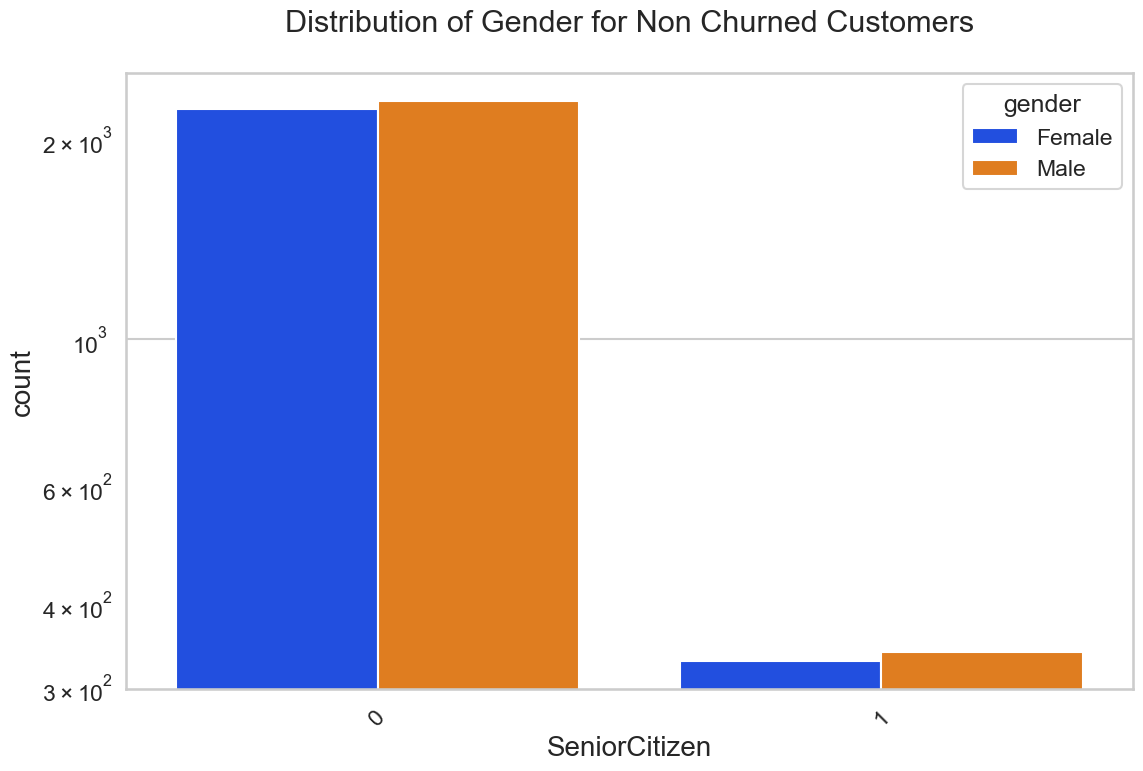

In [91]:
uniplot(new_df1_target0,col='SeniorCitizen',title='Distribution of Gender for Non Churned Customers',hue='gender')

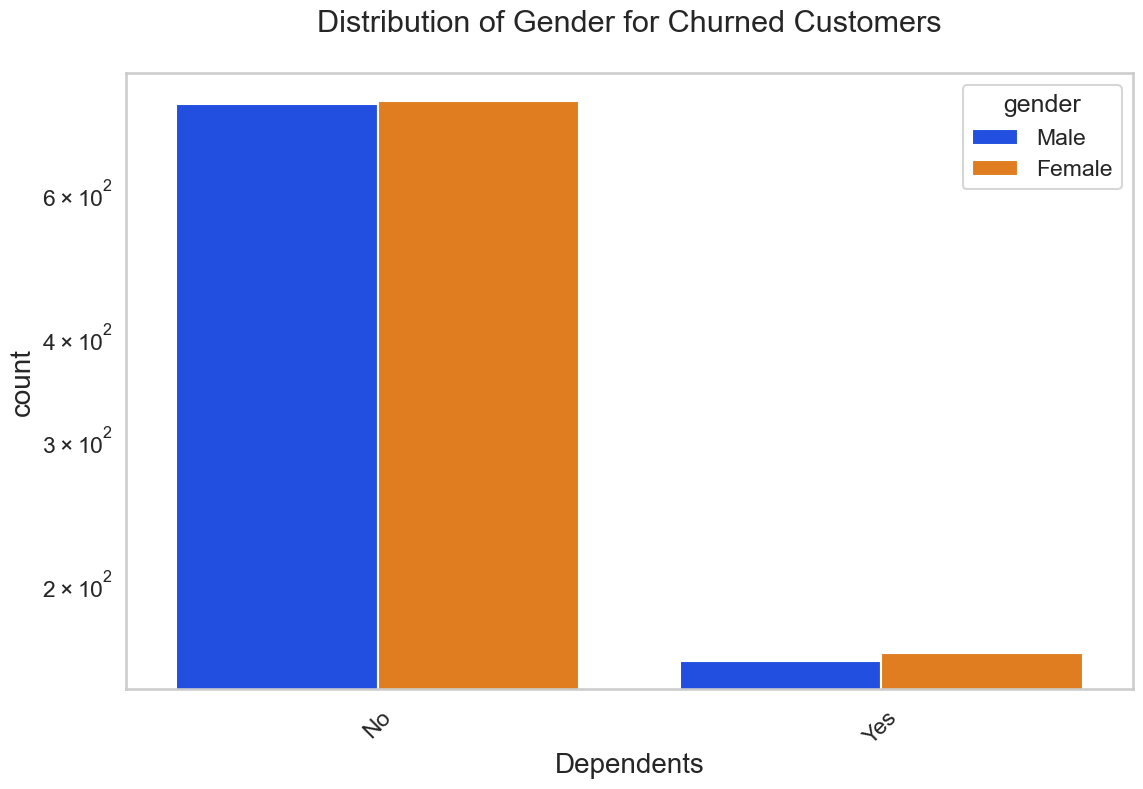

In [92]:
uniplot(new_df1_target1,col='Dependents',title='Distribution of Gender for Churned Customers',hue='gender')

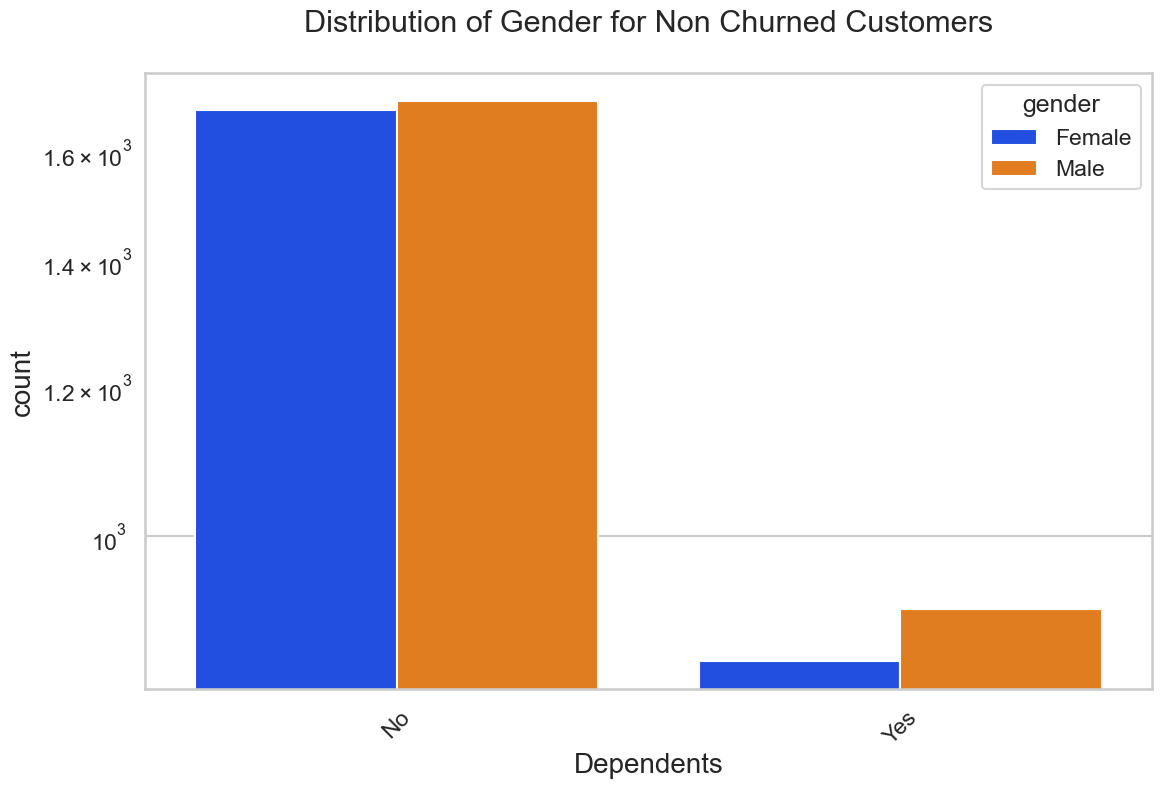

In [93]:

uniplot(new_df1_target0,col='Dependents',title='Distribution of Gender for Non Churned Customers',hue='gender')

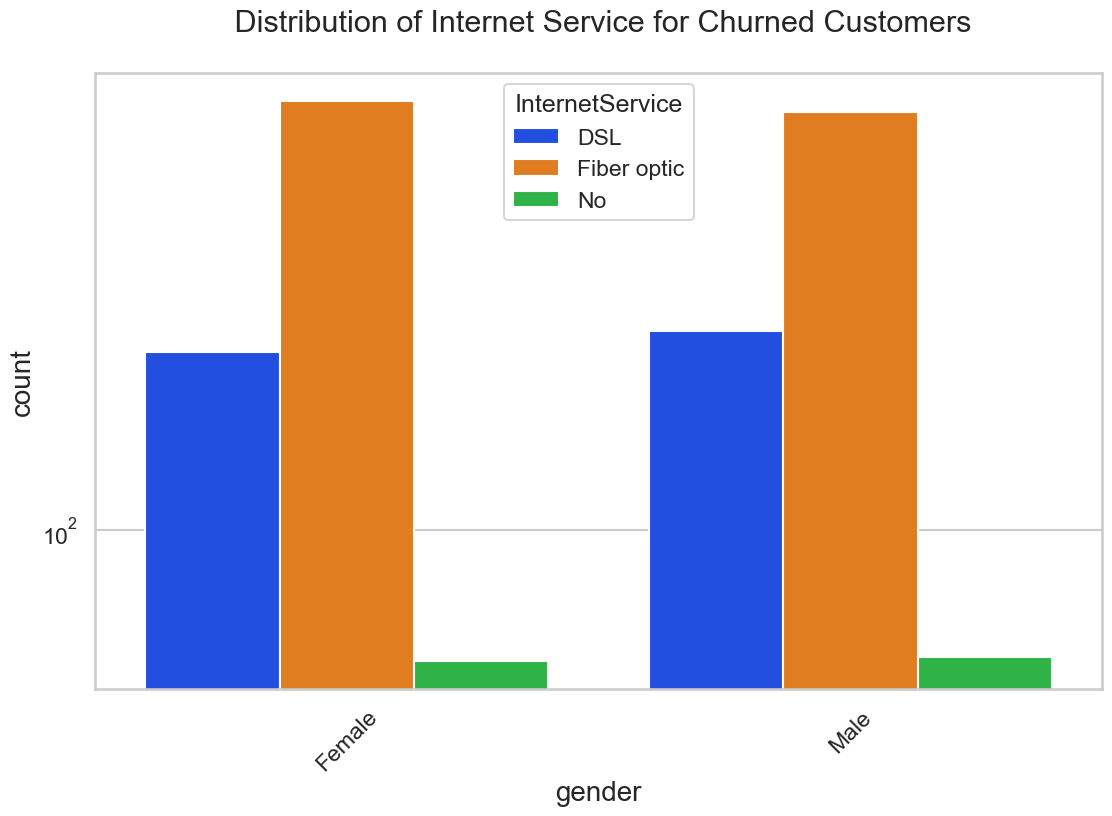

In [95]:
uniplot(new_df1_target1,col='gender',title=' Distribution of Internet Service for Churned Customers',hue='InternetService')

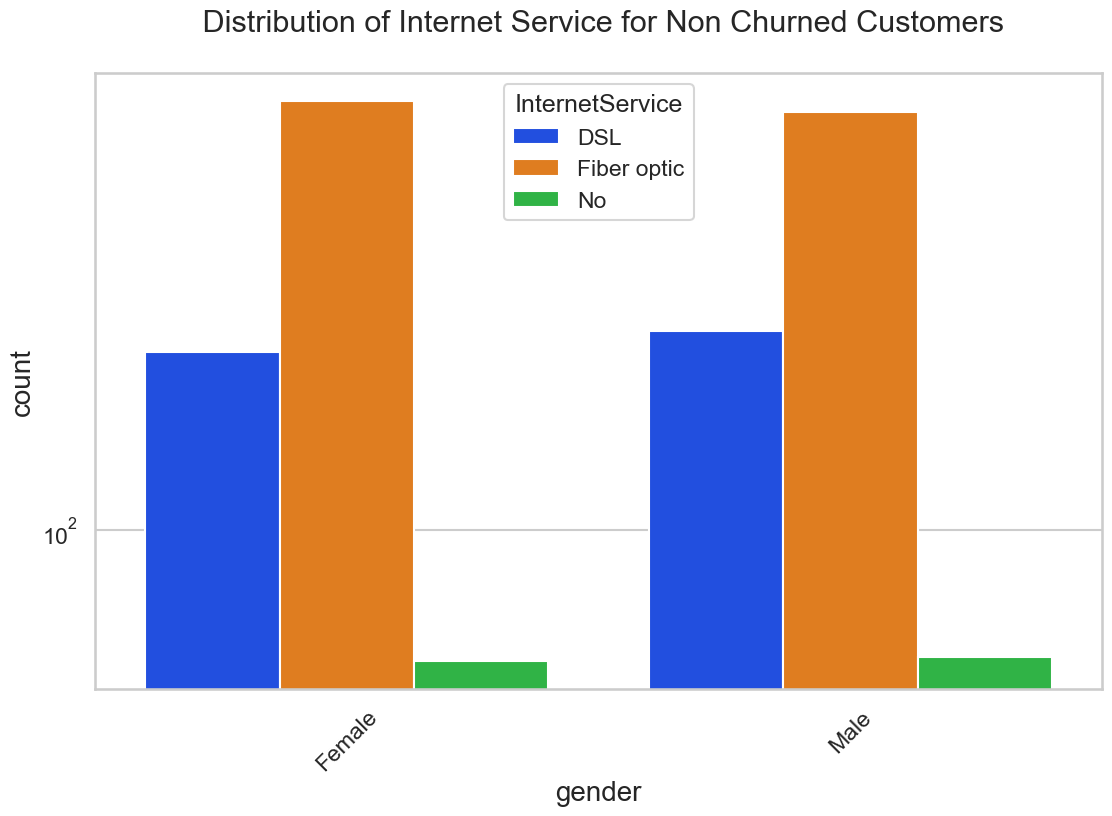

In [99]:
uniplot(new_df1_target1,col='gender',title=' Distribution of Internet Service for Non Churned Customers',hue='InternetService')

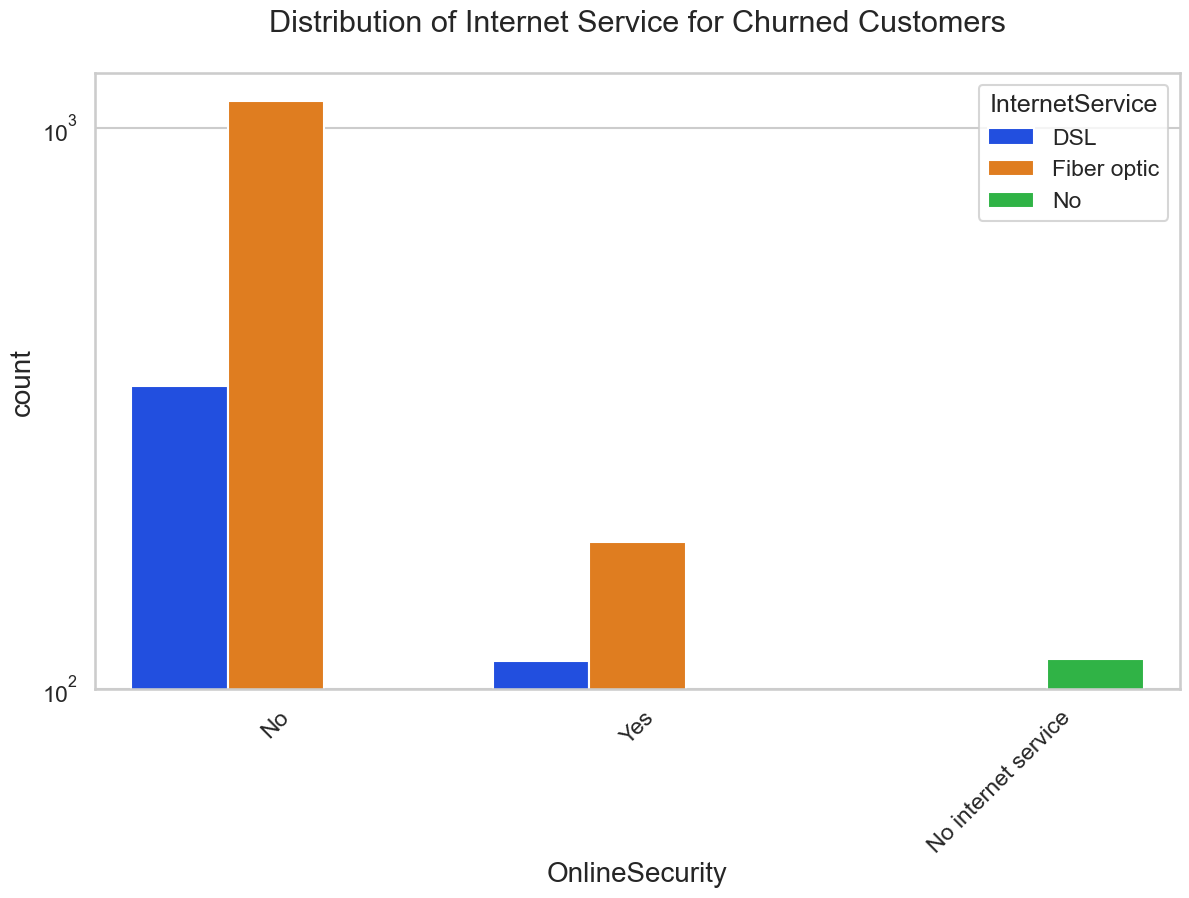

In [100]:
uniplot(new_df1_target1,col='OnlineSecurity',title='Distribution of Internet Service for Churned Customers',hue='InternetService')

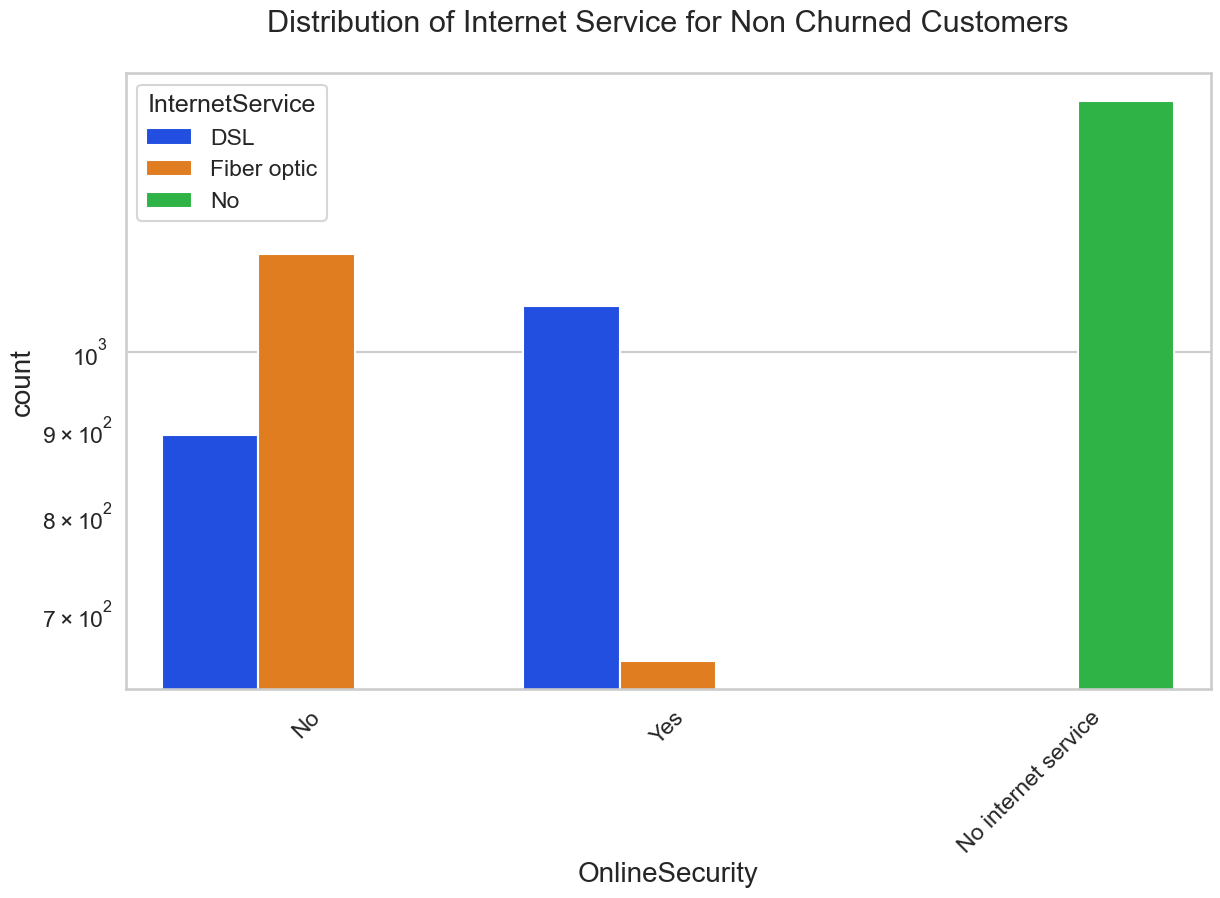

In [102]:
uniplot(new_df1_target0,col='OnlineSecurity',title='Distribution of Internet Service for Non Churned Customers',hue='InternetService')

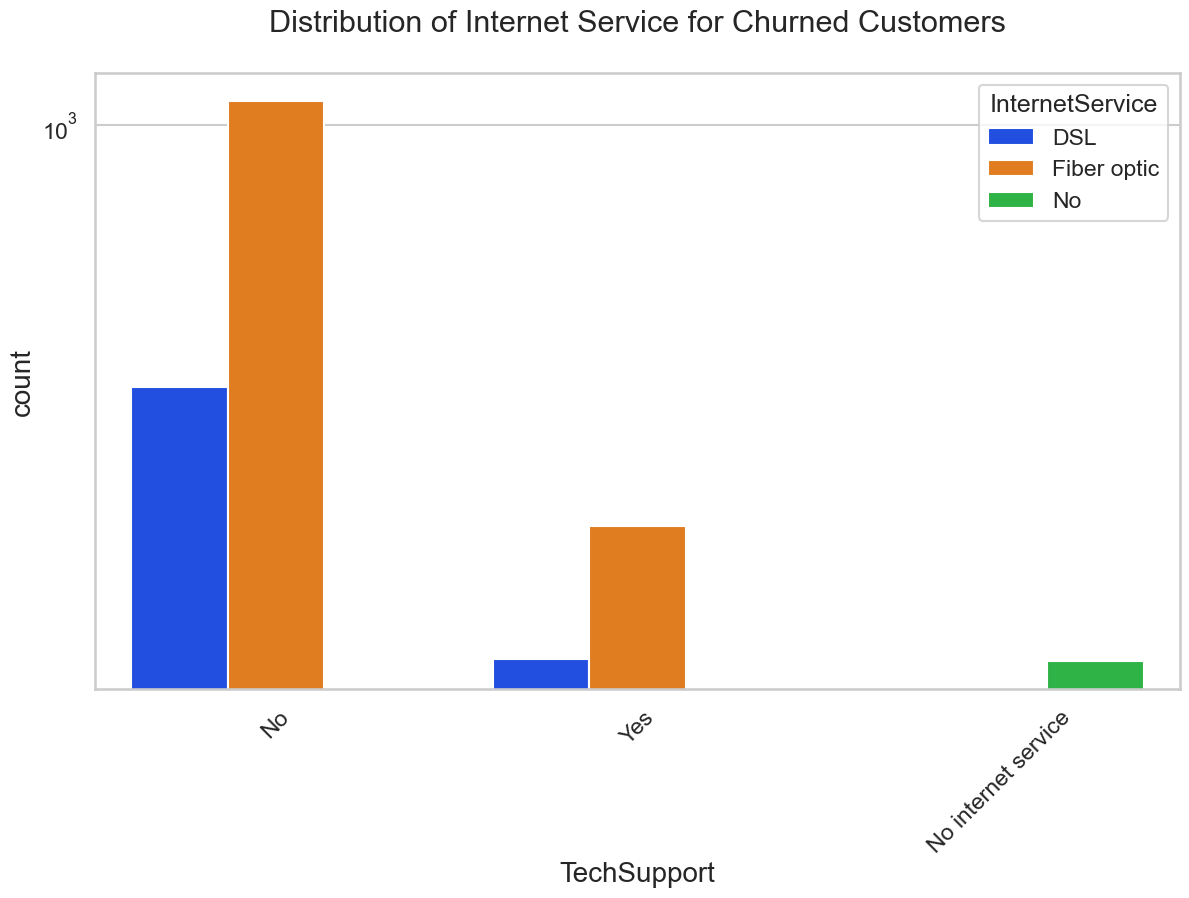

In [105]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of Internet Service for Churned Customers',hue='InternetService')

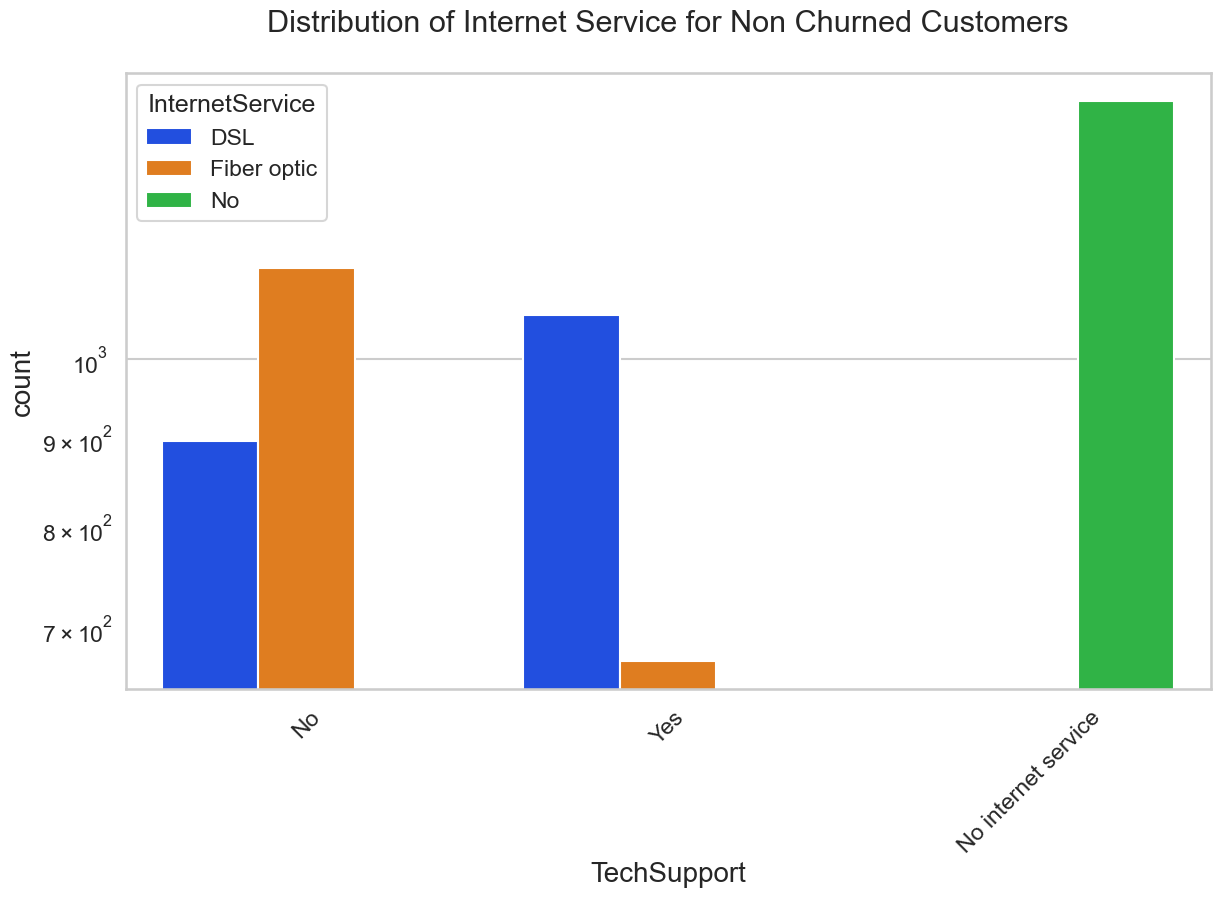

In [106]:
uniplot(new_df1_target0,col='TechSupport',title='Distribution of Internet Service for Non Churned Customers',hue='InternetService')

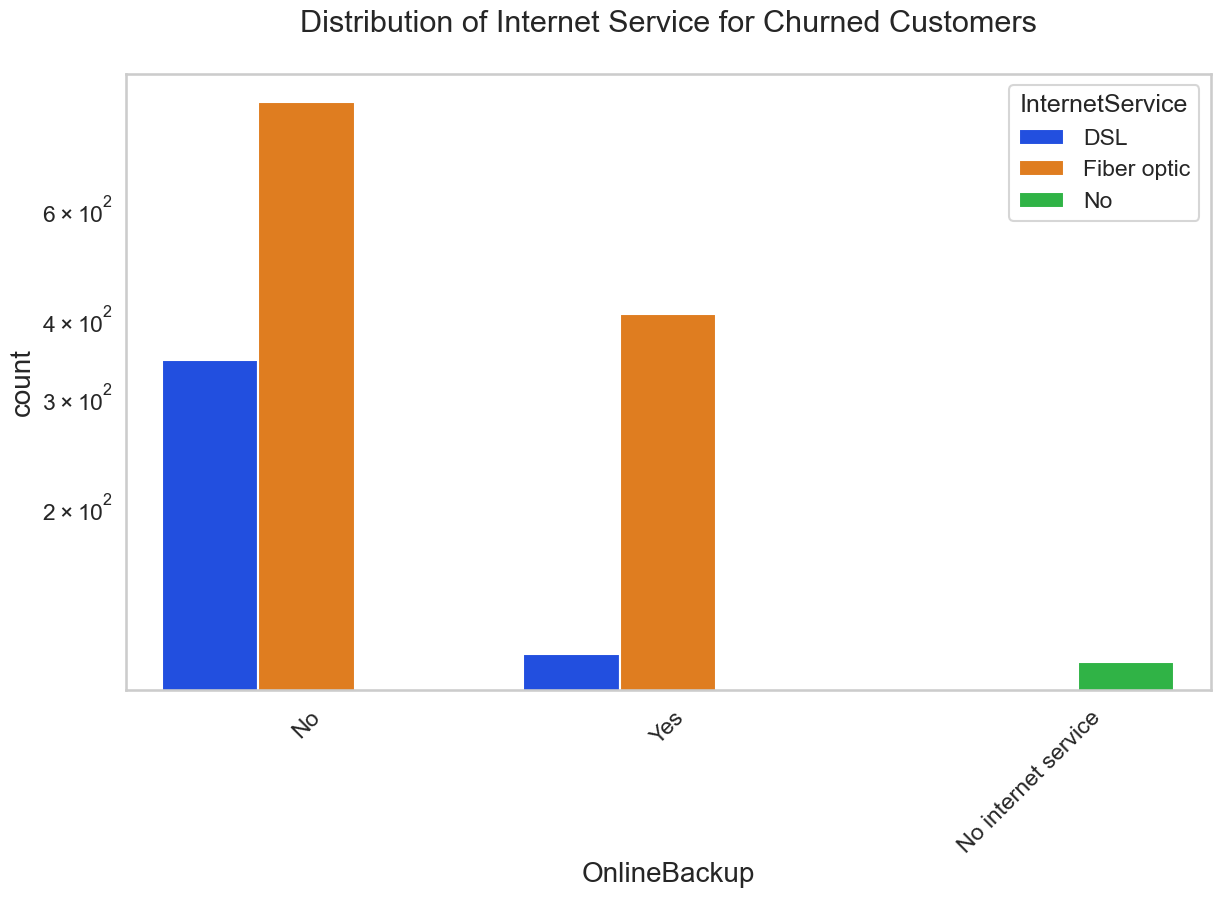

In [107]:
uniplot(new_df1_target1,col='OnlineBackup',title='Distribution of Internet Service for Churned Customers',hue='InternetService')

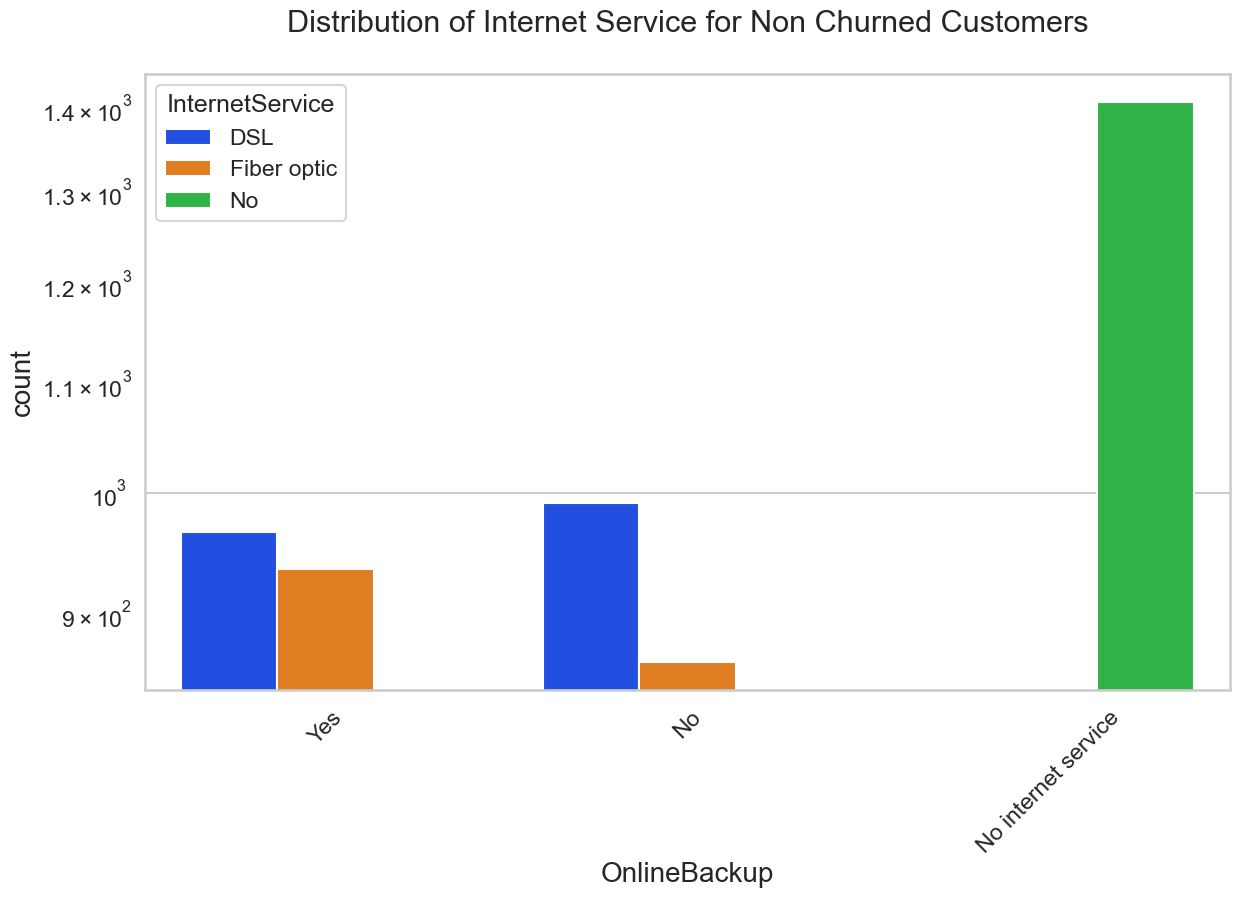

In [108]:
uniplot(new_df1_target0,col='OnlineBackup',title='Distribution of Internet Service for Non Churned Customers',hue='InternetService')

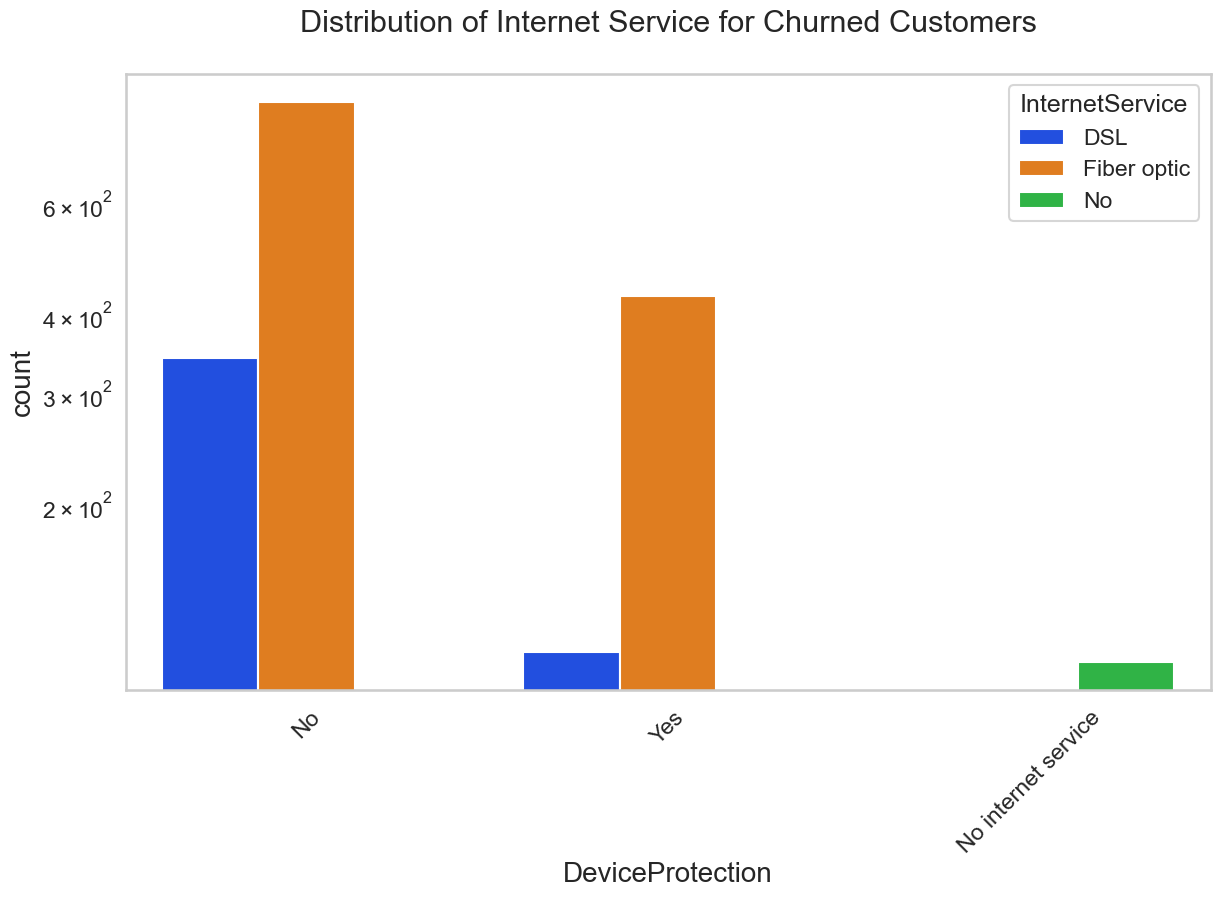

In [109]:
uniplot(new_df1_target1,col='DeviceProtection',title='Distribution of Internet Service for Churned Customers',hue='InternetService')

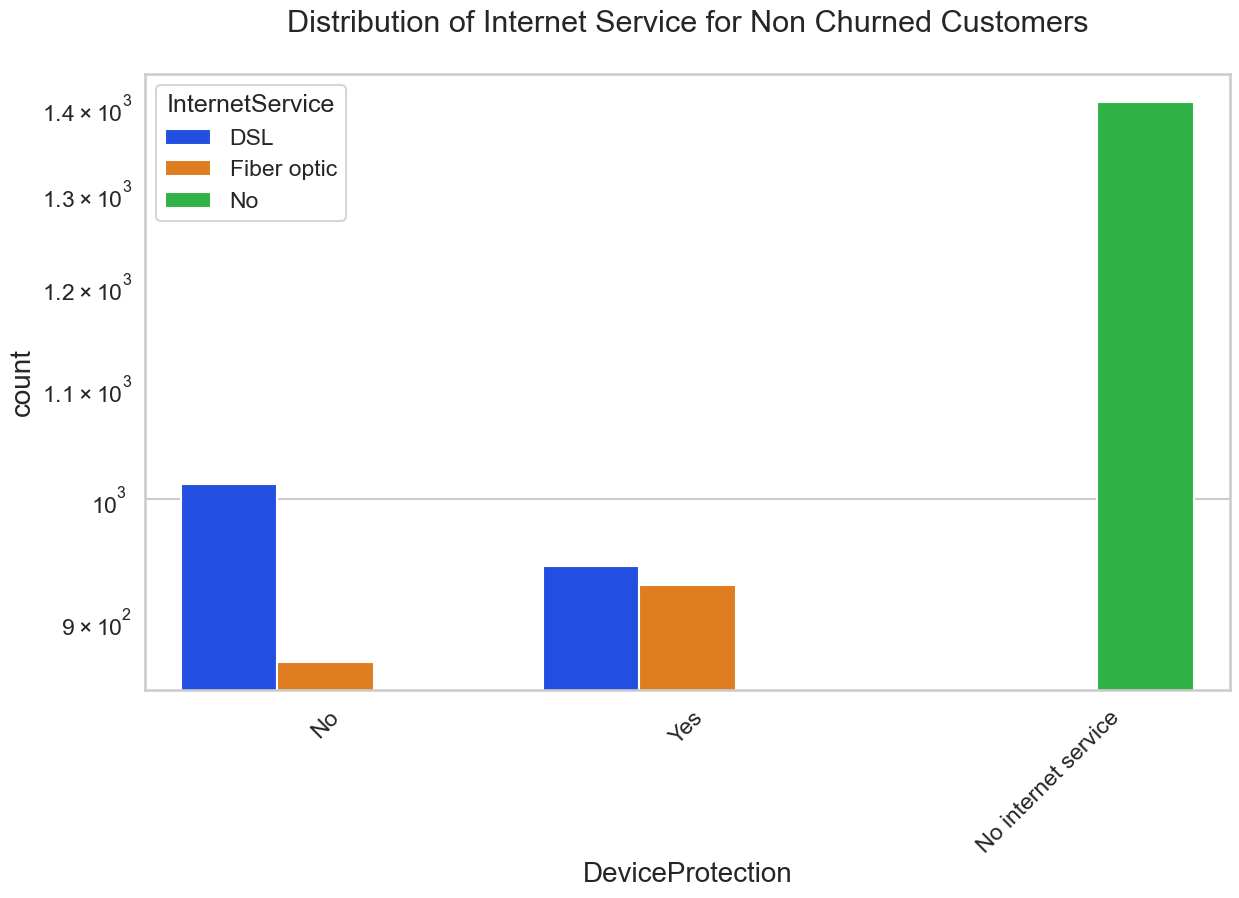

In [110]:
uniplot(new_df1_target0,col='DeviceProtection',title='Distribution of Internet Service for Non Churned Customers',hue='InternetService')

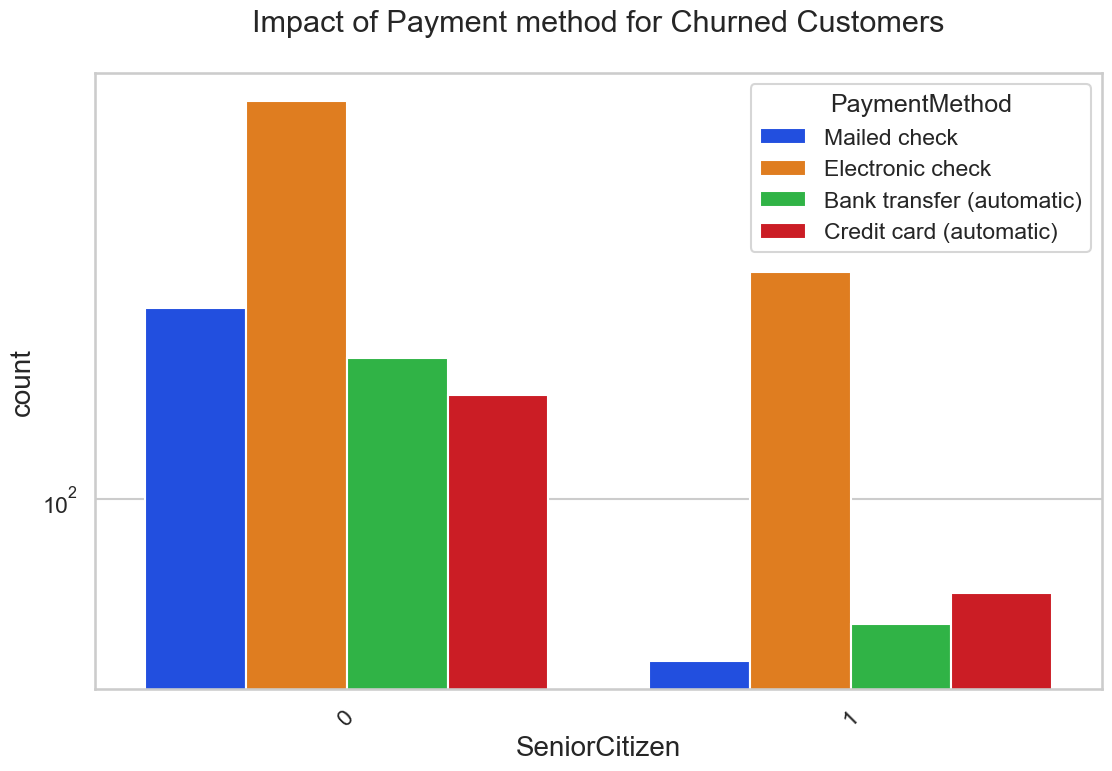

In [111]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Impact of Payment method for Churned Customers',hue='PaymentMethod')

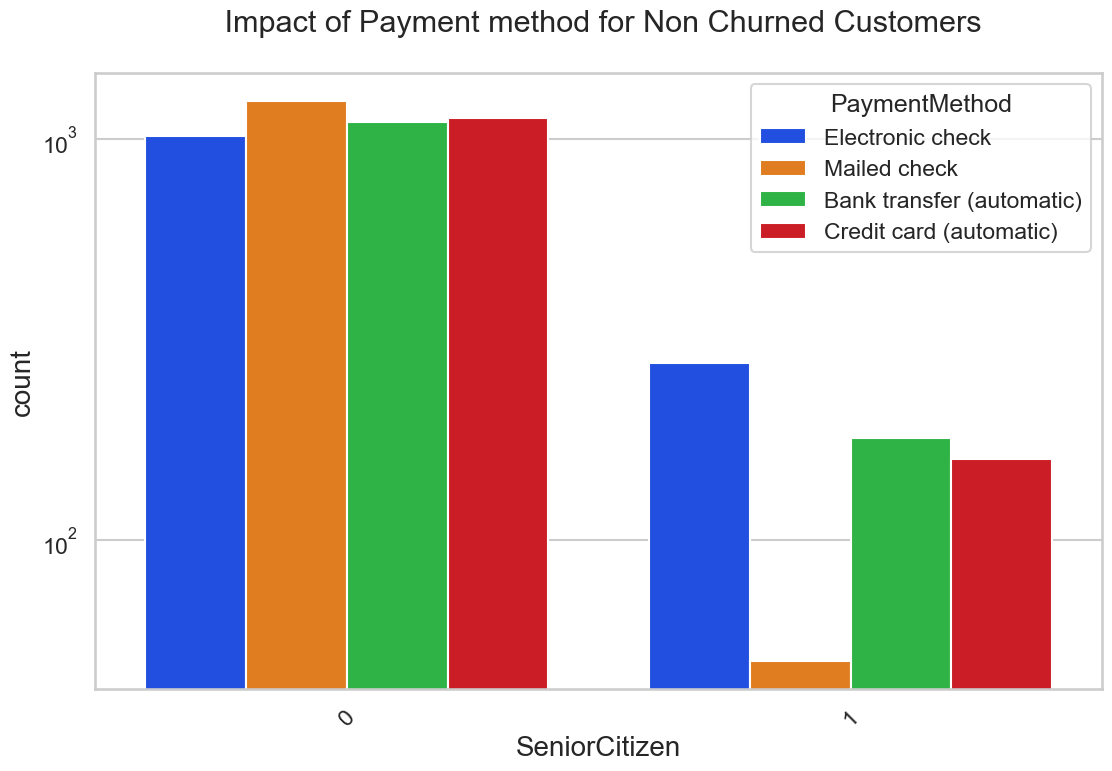

In [112]:
uniplot(new_df1_target0,col='SeniorCitizen',title=' Impact of Payment method for Non Churned Customers',hue='PaymentMethod')

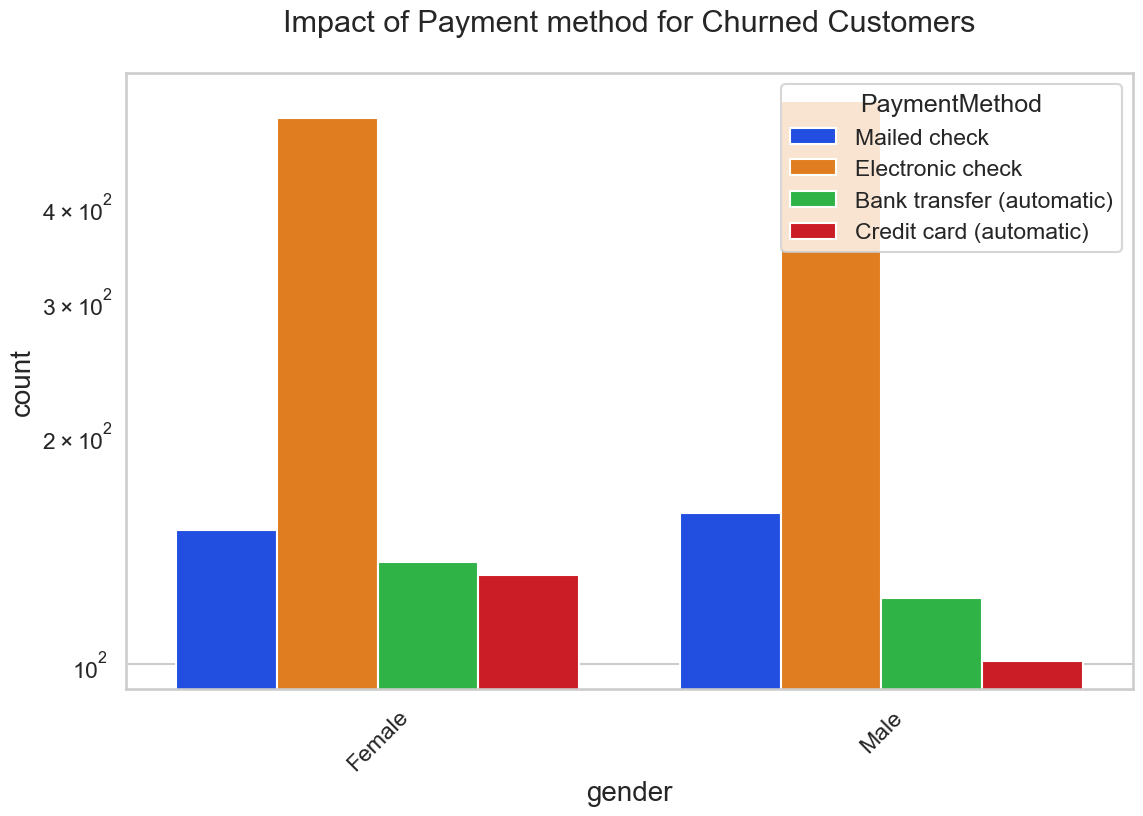

In [113]:
uniplot(new_df1_target1,col='gender',title='Impact of Payment method for Churned Customers',hue='PaymentMethod')

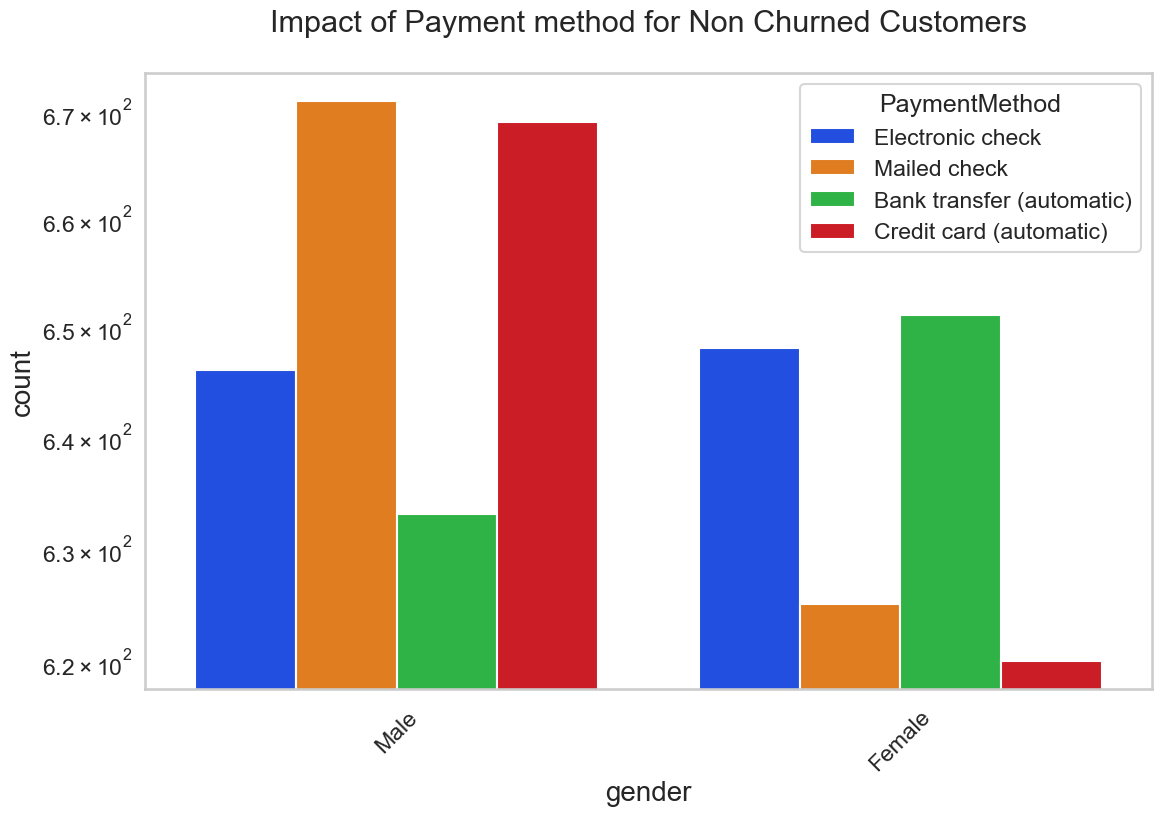

In [114]:
uniplot(new_df1_target0,col='gender',title='Impact of Payment method for Non Churned Customers',hue='PaymentMethod')

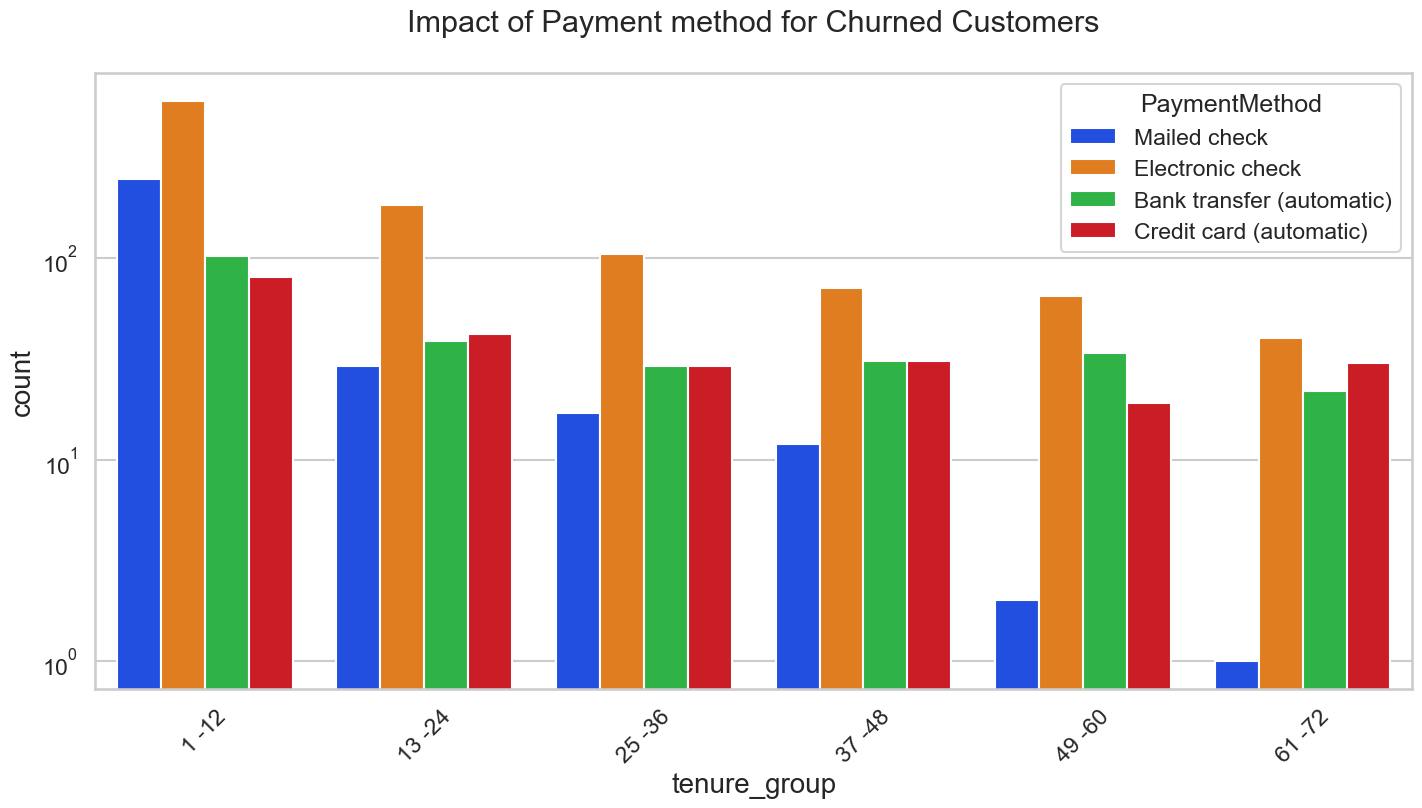

In [115]:
uniplot(new_df1_target1,col='tenure_group',title='Impact of Payment method for Churned Customers',hue='PaymentMethod')

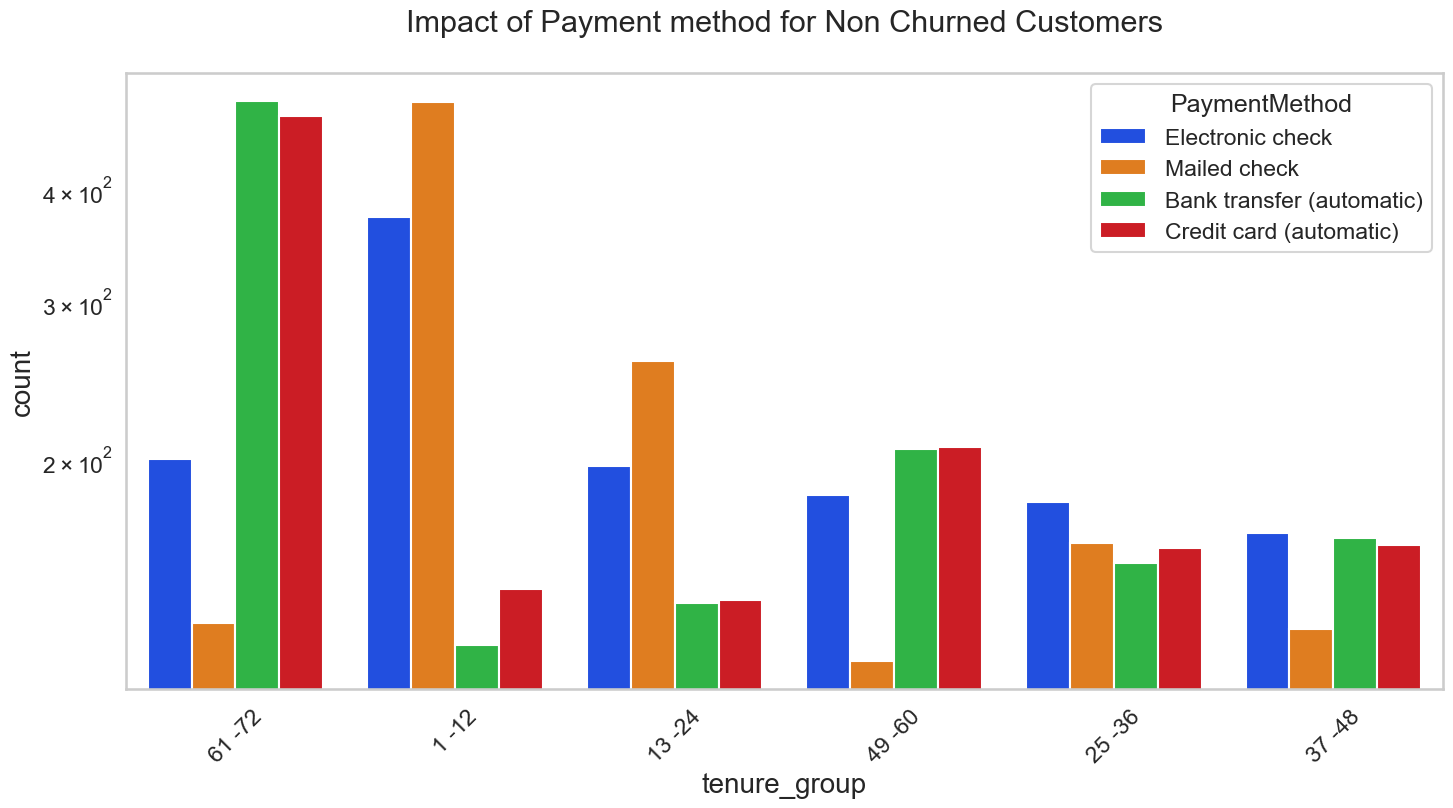

In [116]:
uniplot(new_df1_target0,col='tenure_group',title='Impact of Payment method for Non Churned Customers',hue='PaymentMethod')
     

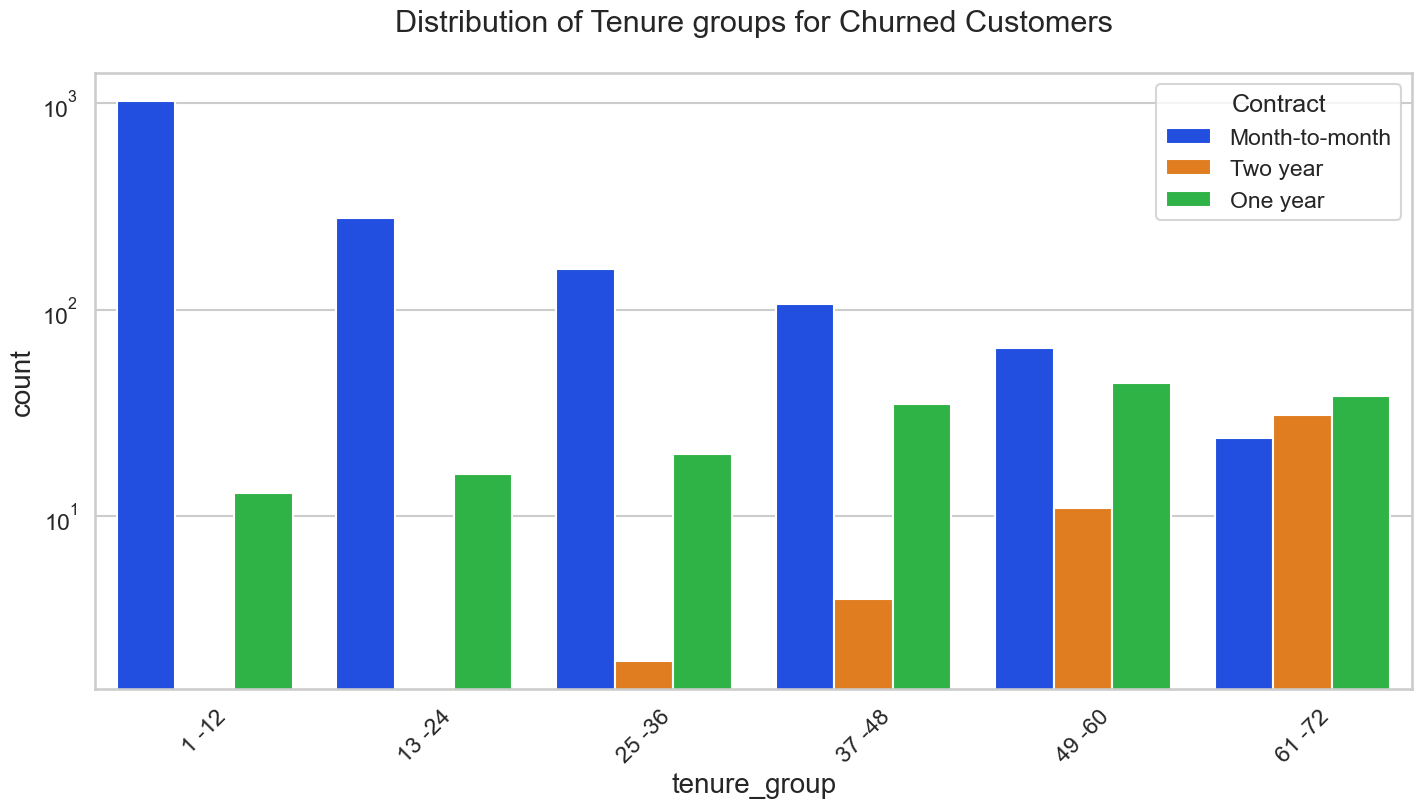

In [117]:
uniplot(new_df1_target1,col='tenure_group',title='Distribution of Tenure groups for Churned Customers',hue='Contract')

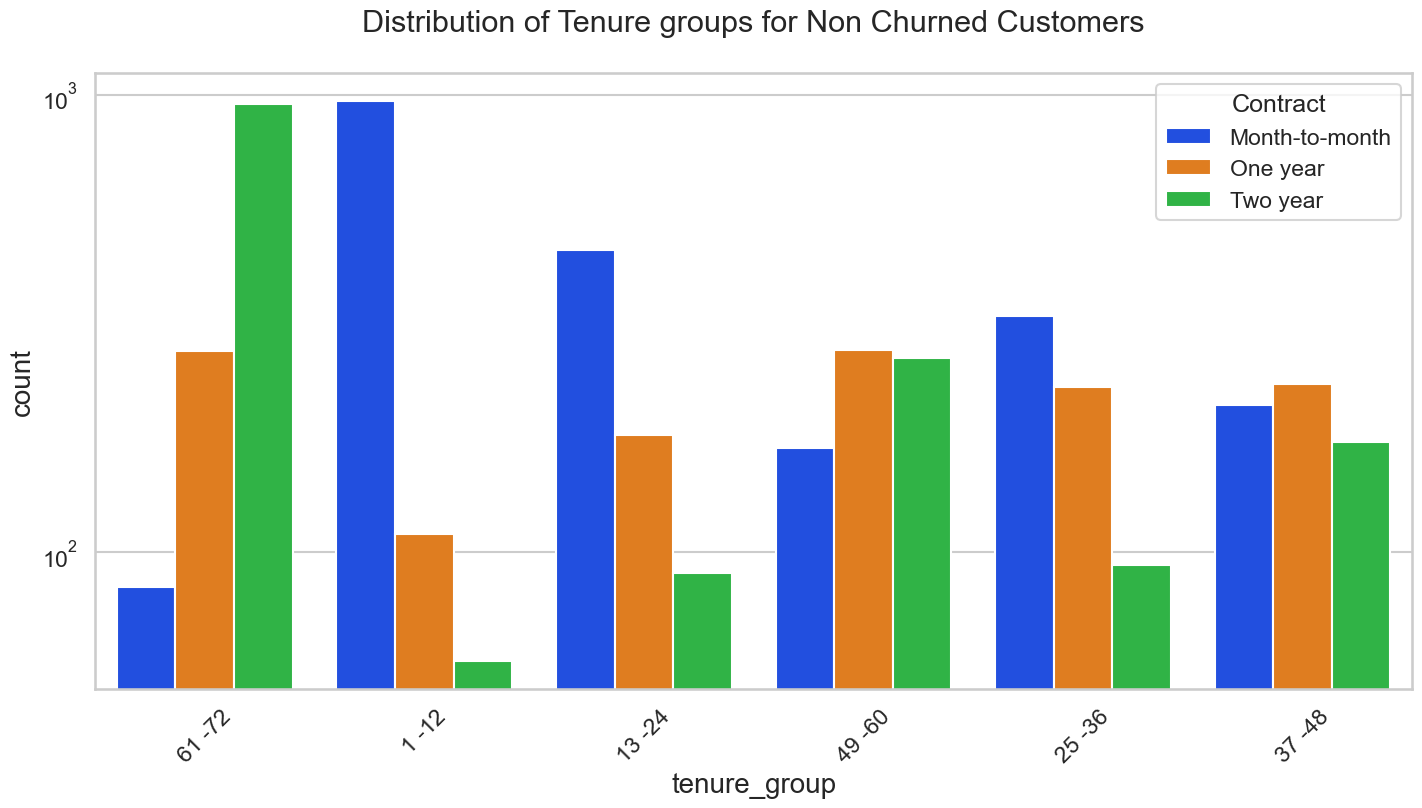

In [118]:
uniplot(new_df1_target0,col='tenure_group',title='Distribution of Tenure groups for Non Churned Customers',hue='Contract')

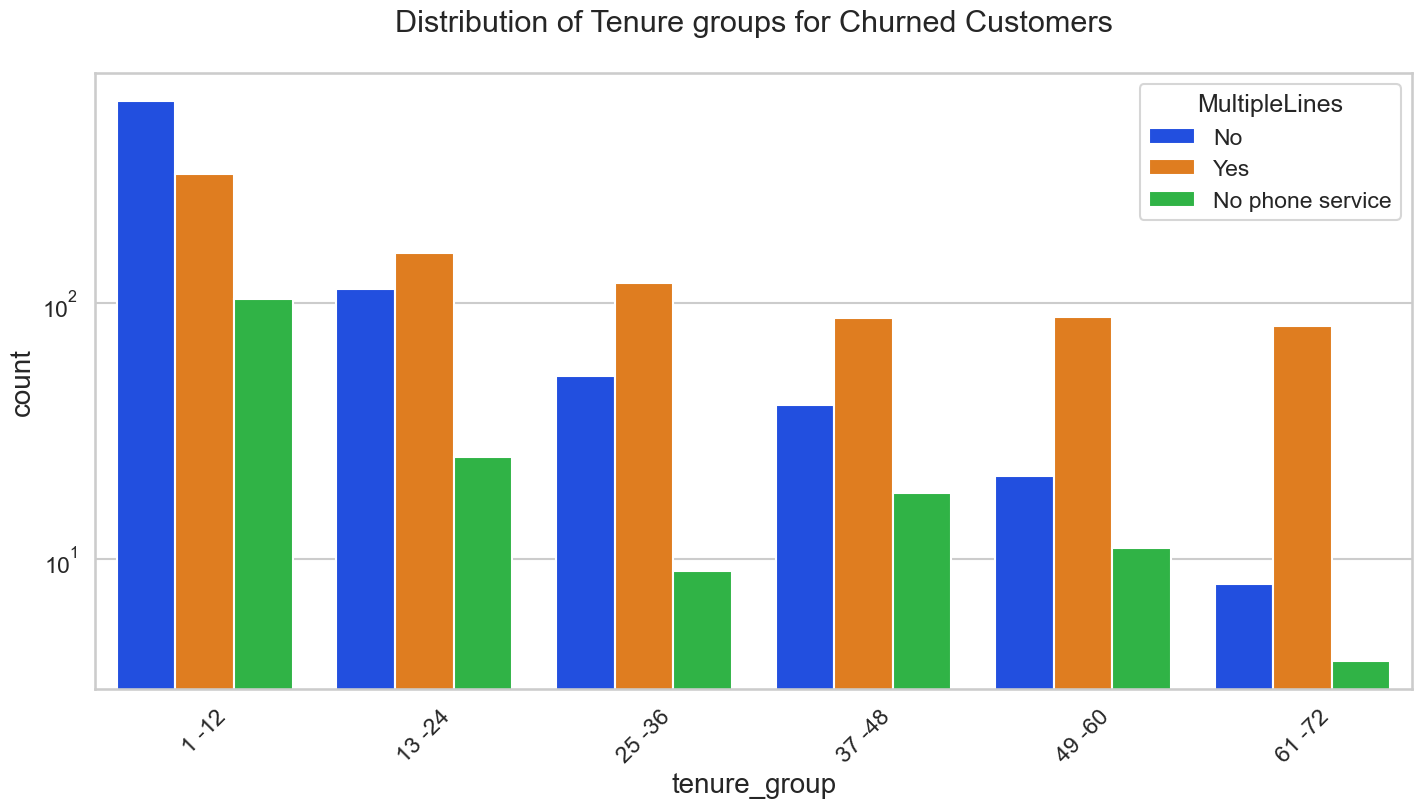

In [119]:
uniplot(new_df1_target1,col='tenure_group',title='Distribution of Tenure groups for Churned Customers',hue='MultipleLines')

# Bivariate Insights:

Gender does not have any significant impact on tendancy to churn.

Customers without Online security, No Tech support, No Online Backup and No Device protection show higher tendancy to churn compared to those without any internet connection.

Customers using Fibre optic service are more likely to churn.

Churn rate is very low with No Internet subscription.

Consumers on month to month contract are more likely to churn regardless of their tenure length and usage of multiple lines.

Customers using Electronic check payment methods are more likely to churn regardless of age, gender or tenure length.
    

# Conclusion:
High Churn:

1. Customers who have no online security, Tech support, Online backup & device protection,are more likely to churn.
2. Customers using Fibre optic service are more likely to churn.
3. Consumers on month to month contract are more likely to churn irrespective of their tenure length and whether they use multiple lines.
4. High monthly charges, shorter tenure, and lower total charges are associated with a high churn rate.
5. Regardless of age, gender, or tenure length, customers using electronic check payment methods are more likely to churning.
6. Senior citizens have an elevated likelihood of churning..
7. Customers who just started subscription  are more likely to churn. 

Low Churn:

1. Customers with a long tenure demonstrate a lower likelihood of churning.
2. The churn rate is minimal among those who do not have an active internet subscription.

No Impact:

1. Factors like Gender, Availability of PhoneService and multiple lines have insignificant impact on churn. 
    